EJERCICIO 1

DATOS ORIGINALES:
      Grupo  Tiempo_ms
0   Grupo 1        250
1   Grupo 1        260
2   Grupo 1        245
3   Grupo 1        255
4   Grupo 1        248
5   Grupo 1        252
6   Grupo 1        258
7   Grupo 1        261
8   Grupo 1        249
9   Grupo 1        257
10  Grupo 2        265
11  Grupo 2        270
12  Grupo 2        260
13  Grupo 2        275
14  Grupo 2        268
15  Grupo 2        267
16  Grupo 2        272
17  Grupo 2        269
18  Grupo 2        271
19  Grupo 2        266
20  Grupo 3        240
21  Grupo 3        235
22  Grupo 3        242
23  Grupo 3        238
24  Grupo 3        236
25  Grupo 3        239
26  Grupo 3        241
27  Grupo 3        237
28  Grupo 3        243
29  Grupo 3        240

Medias por Grupo:
  Grupo 1: 253.5000
  Grupo 2: 268.3000
  Grupo 3: 239.1000
Media Global: 253.6333

TABLA ANOVA DE UNA VÍA
Fuente de Variación            SC     gl           CM            F      Valor-p
---------------------------------------------------------------

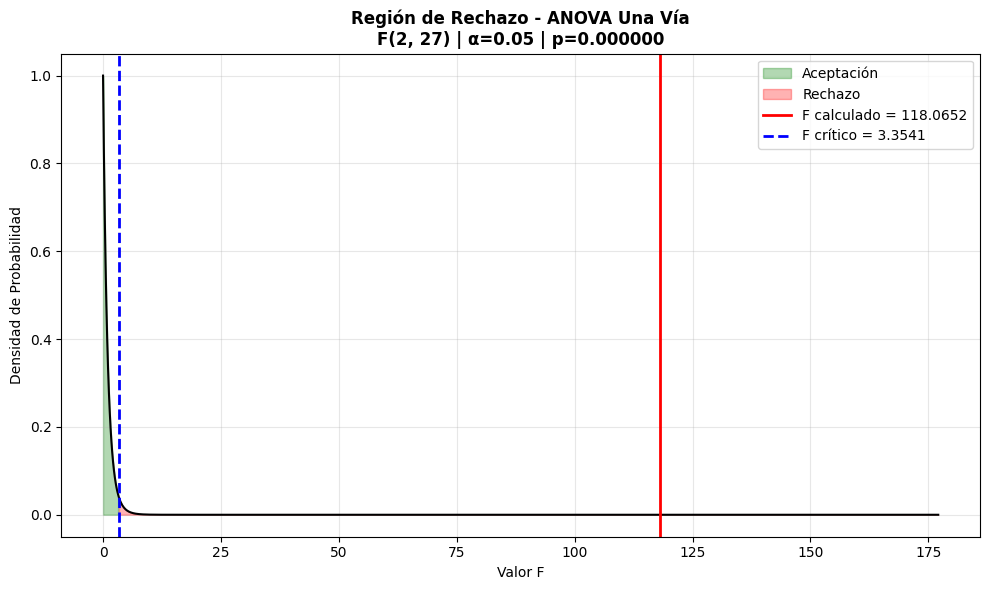

In [ ]:
# @title
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS EJERCICIO 1 - Tiempos de reacción
# ============================================================================

data = {
    'Grupo': ['Grupo 1'] * 10 + ['Grupo 2'] * 10 + ['Grupo 3'] * 10,
    'Tiempo_ms': [
        # Grupo 1
        250, 260, 245, 255, 248, 252, 258, 261, 249, 257,
        # Grupo 2
        265, 270, 260, 275, 268, 267, 272, 269, 271, 266,
        # Grupo 3
        240, 235, 242, 238, 236, 239, 241, 237, 243, 240
    ]
}

df = pd.DataFrame(data)
grupos = df['Grupo'].unique()

# ============================================================================
# CÁLCULOS PRELIMINARES
# ============================================================================

datos = [df[df['Grupo'] == g]['Tiempo_ms'].values for g in grupos]
n_grupos = len(grupos)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Tiempo_ms'].mean()
medias_grupo = df.groupby('Grupo')['Tiempo_ms'].mean().values

print("DATOS ORIGINALES:")
print(df)
print("\nMedias por Grupo:")
for i, g in enumerate(grupos):
    print(f"  {g}: {medias_grupo[i]:.4f}")
print(f"Media Global: {media_global:.4f}\n")

# ============================================================================
# ANOVA DE UNA VÍA
# ============================================================================

SCT = np.sum((df['Tiempo_ms'] - media_global)**2)
SCB = sum([n_obs[i]*(medias_grupo[i] - media_global)**2 for i in range(n_grupos)])
SCE = SCT - SCB

gl_b = n_grupos - 1
gl_e = n_total - n_grupos
gl_t = n_total - 1

CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, gl_b, gl_e)

# ============================================================================
# TABLA ANOVA
# ============================================================================

print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Grupos':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<20} {SCT:>12.4f} {gl_t:>6}")
print("="*80)

# ============================================================================
# INTERPRETACIÓN
# ============================================================================

print(f"\nINTERPRETACIÓN (α = {alpha}):")
print(f"  F calculado = {F:.4f}")
print(f"  F crítico = {F_crit:.4f}")
print(f"  Valor-p = {p_value:.6f}")

if p_value < alpha:
    print("  ✓ Hay diferencias significativas entre los grupos.\n")
else:
    print("  ✗ No hay diferencias significativas entre los grupos.\n")

# ============================================================================
# GRÁFICO DE REGIÓN DE RECHAZO
# ============================================================================

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', linewidth=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', linewidth=2, label=f'F calculado = {F:.4f}')
plt.axvline(F_crit, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.4f}')
plt.title(f'Región de Rechazo - ANOVA Una Vía\nF({gl_b}, {gl_e}) | α={alpha} | p={p_value:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


EJERCICIO 2

TABLA ANOVA DE UNA VÍA
Fuente de Variación            SC     gl           CM            F      Valor-p
--------------------------------------------------------------------------------
Entre Métodos           1605.1667      2     802.5833     260.7244     0.000000
Error                    101.5833     33       3.0783

INTERPRETACIÓN (α = 0.01):
  F calculado = 260.7244
  F crítico = 5.3120
  Valor-p = 0.000000
  ✓ Hay diferencias significativas entre los métodos.



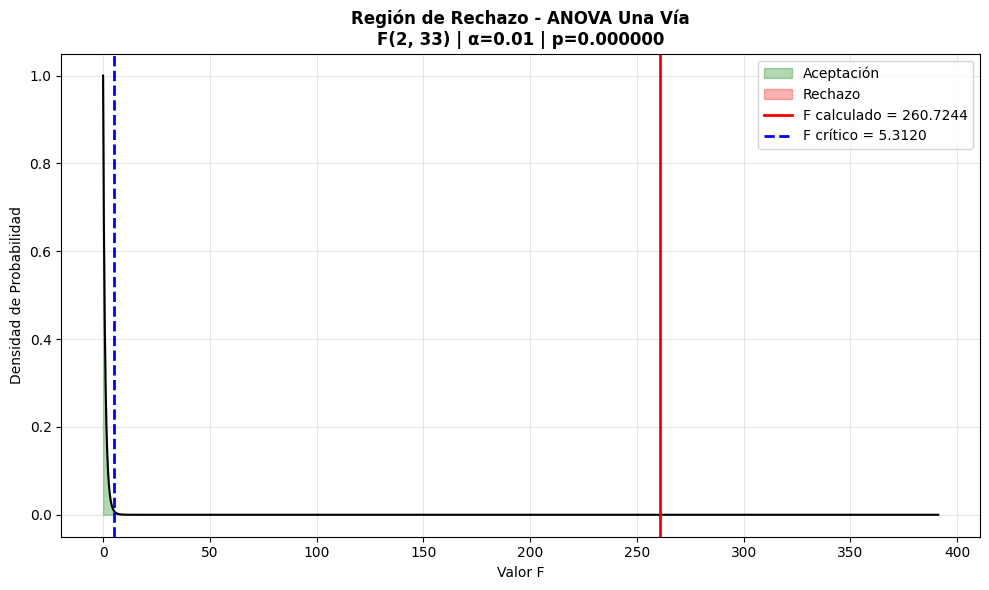

In [ ]:
# @title
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL EJERCICIO 2 - Métodos de enseñanza
# ============================================================================

data = {
    'Método': ['A'] * 12 + ['B'] * 12 + ['C'] * 12,
    'Calificación': [
        78, 80, 76, 82, 79, 81, 77, 80, 83, 79, 78, 80,
        85, 88, 84, 87, 86, 89, 90, 85, 87, 88, 86, 87,
        70, 72, 68, 71, 69, 73, 70, 72, 71, 70, 69, 71
    ]
}

df = pd.DataFrame(data)
metodos = df['Método'].unique()

# ============================================================================
# ANOVA DE UNA VÍA
# ============================================================================

datos = [df[df['Método'] == m]['Calificación'].values for m in metodos]
n_metodos = len(metodos)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Calificación'].mean()
medias = df.groupby('Método')['Calificación'].mean().values

SCT = np.sum((df['Calificación'] - media_global)**2)
SCB = sum([n_obs[i]*(medias[i] - media_global)**2 for i in range(n_metodos)])
SCE = SCT - SCB

gl_b = n_metodos - 1
gl_e = n_total - n_metodos
CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
alpha = 0.01
F_crit = stats.f.ppf(1 - alpha, gl_b, gl_e)

# ============================================================================
# RESULTADOS Y GRÁFICO
# ============================================================================

print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Métodos':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print("="*80)

print(f"\nINTERPRETACIÓN (α = {alpha}):")
print(f"  F calculado = {F:.4f}")
print(f"  F crítico = {F_crit:.4f}")
print(f"  Valor-p = {p_value:.6f}")

if p_value < alpha:
    print("  ✓ Hay diferencias significativas entre los métodos.\n")
else:
    print("  ✗ No hay diferencias significativas entre los métodos.\n")

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', linewidth=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', linewidth=2, label=f'F calculado = {F:.4f}')
plt.axvline(F_crit, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.4f}')
plt.title(f'Región de Rechazo - ANOVA Una Vía\nF({gl_b}, {gl_e}) | α={alpha} | p={p_value:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

EJERCICIO 3

TABLA ANOVA DE UNA VÍA
Fuente de Variación            SC     gl           CM            F      Valor-p
--------------------------------------------------------------------------------
Entre Fertilizantes      142.3438      3      47.4479      53.4087     0.000000
Error                     24.8750     28       0.8884

INTERPRETACIÓN (α = 0.05):
  F calculado = 53.4087
  F crítico = 2.9467
  Valor-p = 0.000000
  ✓ Hay diferencias significativas entre los fertilizantes.



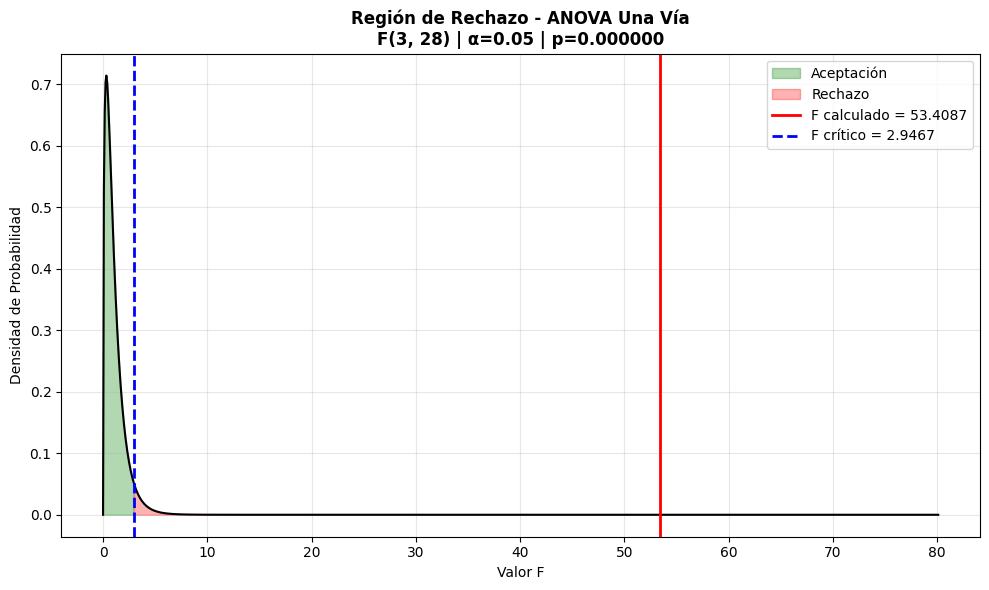

In [ ]:
# @title
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL EJERCICO 3 - Fertilizantes
# ============================================================================

data = {
    'Fertilizante': ['F1'] * 8 + ['F2'] * 8 + ['F3'] * 8 + ['F4'] * 8,
    'Altura_cm': [
        15, 16, 14, 17, 15, 16, 14, 15,
        18, 17, 19, 18, 17, 20, 19, 18,
        16, 15, 16, 15, 16, 15, 16, 15,
        20, 21, 19, 20, 21, 22, 21, 19
    ]
}

df = pd.DataFrame(data)
fertilizantes = df['Fertilizante'].unique()

# ============================================================================
# ANOVA DE UNA VÍA
# ============================================================================

datos = [df[df['Fertilizante'] == f]['Altura_cm'].values for f in fertilizantes]
n_fert = len(fertilizantes)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Altura_cm'].mean()
medias = df.groupby('Fertilizante')['Altura_cm'].mean().values

SCT = np.sum((df['Altura_cm'] - media_global)**2)
SCB = sum([n_obs[i]*(medias[i] - media_global)**2 for i in range(n_fert)])
SCE = SCT - SCB

gl_b = n_fert - 1
gl_e = n_total - n_fert
CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, gl_b, gl_e)

# ============================================================================
# RESULTADOS Y GRÁFICO
# ============================================================================

print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Fertilizantes':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print("="*80)

print(f"\nINTERPRETACIÓN (α = {alpha}):")
print(f"  F calculado = {F:.4f}")
print(f"  F crítico = {F_crit:.4f}")
print(f"  Valor-p = {p_value:.6f}")

if p_value < alpha:
    print("  ✓ Hay diferencias significativas entre los fertilizantes.\n")
else:
    print("  ✗ No hay diferencias significativas entre los fertilizantes.\n")

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', linewidth=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', linewidth=2, label=f'F calculado = {F:.4f}')
plt.axvline(F_crit, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.4f}')
plt.title(f'Región de Rechazo - ANOVA Una Vía\nF({gl_b}, {gl_e}) | α={alpha} | p={p_value:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

EJERCICIO 4


=== ANOVA DE UNA VÍA: Concentración de un compuesto ===
Fuente de Variación            SC     gl           CM            F      p-valor
--------------------------------------------------------------------------
Entre Tecnica            232.2963      2     116.1481      98.0000     0.000000
Error                     28.4444     24       1.1852
Total                    260.7407     26
--------------------------------------------------------------------------

INTERPRETACIÓN (α = 0.05):
  F calculado = 98.0000
  F crítico = 3.4028
  Valor-p = 0.000000
✓ Hay diferencias significativas entre los grupos.



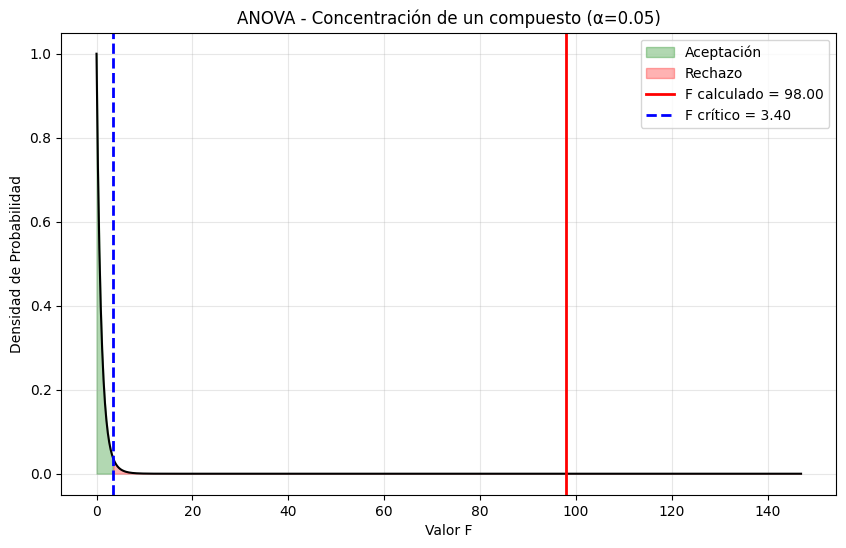

In [ ]:
# @title
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================
# EJERCICIO 4 - Concentración de un compuesto
# ============================================================

data = {
    'Tecnica': ['Tecnica 1']*9 + ['Tecnica 2']*9 + ['Tecnica 3']*9,
    'Concentración': [
        # Tecnica 1
        30, 32, 31, 29, 30, 33, 32, 31, 30,
        # Tecnica 2
        35, 36, 34, 35, 37, 36, 34, 35, 36,
        # Tecnica 3
        28, 27, 29, 28, 30, 29, 28, 27, 28
    ]
}

df = pd.DataFrame(data)
Tecnicas = df['Tecnica'].unique()
datos = [df[df['Tecnica'] == g]['Concentración'].values for g in Tecnicas]
n_Tecnicas = len(Tecnicas)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Concentración'].mean()
medias = df.groupby('Tecnica')['Concentración'].mean().values

# ============================================================
# ANOVA MANUAL
# ============================================================

SCT = np.sum((df['Concentración'] - media_global)**2)
SCB = sum([n_obs[i]*(medias[i] - media_global)**2 for i in range(n_Tecnicas)])
SCE = SCT - SCB

gl_b = n_Tecnicas - 1
gl_e = n_total - n_Tecnicas
gl_t = n_total - 1

CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
F_crit = stats.f.ppf(0.95, gl_b, gl_e)

# ============================================================
# TABLA ANOVA
# ============================================================

print("\n=== ANOVA DE UNA VÍA: Concentración de un compuesto ===")
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'p-valor':>12}")
print("-"*74)
print(f"{'Entre Tecnica':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print(f"{'Total':<20} {SCT:>12.4f} {gl_t:>6}")
print("-"*74)

# ============================================================
# INTERPRETACIÓN
# ============================================================

alpha = 0.05
print(f"\nINTERPRETACIÓN (α = {alpha}):")
print(f"  F calculado = {F:.4f}")
print(f"  F crítico = {F_crit:.4f}")
print(f"  Valor-p = {p_value:.6f}")
if p_value < alpha:
    print("✓ Hay diferencias significativas entre los grupos.\n")
else:
    print("✗ No hay diferencias significativas entre los grupos.\n")

# ============================================================
# GRÁFICA DE REGIÓN DE RECHAZO
# ============================================================

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'k-', lw=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', lw=2, label=f'F calculado = {F:.2f}')
plt.axvline(F_crit, color='blue', ls='--', lw=2, label=f'F crítico = {F_crit:.2f}')
plt.title(f'ANOVA - Concentración de un compuesto (α={alpha})')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

EJERCICIO 5

TABLA ANOVA DE UNA VÍA
Fuente de Variación            SC     gl           CM            F      Valor-p
--------------------------------------------------------------------------------
Entre Fertilizantes      369.8000      3     123.2667     114.9637     0.000000
Error                     38.6000     36       1.0722

INTERPRETACIÓN (α = 0.05):
  F calculado = 114.9637
  F crítico = 2.8663
  Valor-p = 0.000000
  ✓ Hay diferencias significativas entre los fertilizantes.



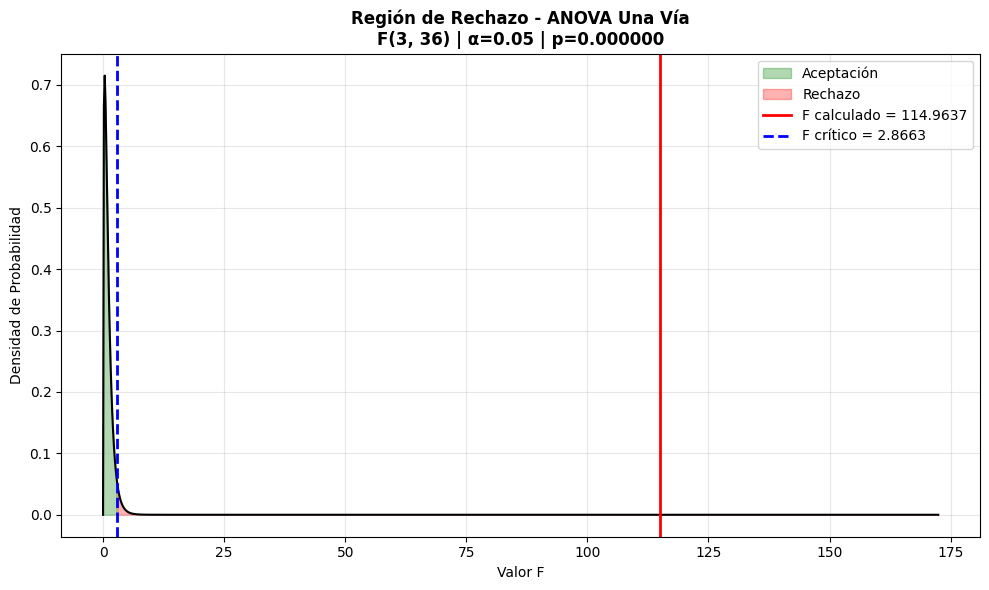

In [ ]:
# @title
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================================
# DATOS DEL EJERCICO 5 - Tratamientos de fertilizantes
# ============================================================================

data = {
    'Fertilizante': ['A'] * 10 + ['B'] * 10 + ['C'] * 10 + ['D'] * 10,
    'Altura_cm': [
        20, 22, 19, 21, 20, 23, 22, 21, 20, 22,
        25, 24, 26, 27, 25, 26, 24, 27, 26, 25,
        22, 23, 21, 22, 21, 23, 22, 21, 22, 23,
        28, 29, 27, 30, 29, 28, 29, 30, 28, 29
    ]
}

df = pd.DataFrame(data)
fertilizantes = df['Fertilizante'].unique()

# ============================================================================
# ANOVA DE UNA VÍA
# ============================================================================

datos = [df[df['Fertilizante'] == f]['Altura_cm'].values for f in fertilizantes]
n_fert = len(fertilizantes)
n_obs = [len(g) for g in datos]
n_total = sum(n_obs)

media_global = df['Altura_cm'].mean()
medias = df.groupby('Fertilizante')['Altura_cm'].mean().values

SCT = np.sum((df['Altura_cm'] - media_global)**2)
SCB = sum([n_obs[i]*(medias[i] - media_global)**2 for i in range(n_fert)])
SCE = SCT - SCB

gl_b = n_fert - 1
gl_e = n_total - n_fert
CMb = SCB / gl_b
CMe = SCE / gl_e

F = CMb / CMe
p_value = 1 - stats.f.cdf(F, gl_b, gl_e)
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, gl_b, gl_e)

# ============================================================================
# RESULTADOS Y GRÁFICO
# ============================================================================

print("TABLA ANOVA DE UNA VÍA")
print("="*80)
print(f"{'Fuente de Variación':<20} {'SC':>12} {'gl':>6} {'CM':>12} {'F':>12} {'Valor-p':>12}")
print("-"*80)
print(f"{'Entre Fertilizantes':<20} {SCB:>12.4f} {gl_b:>6} {CMb:>12.4f} {F:>12.4f} {p_value:>12.6f}")
print(f"{'Error':<20} {SCE:>12.4f} {gl_e:>6} {CMe:>12.4f}")
print("="*80)

print(f"\nINTERPRETACIÓN (α = {alpha}):")
print(f"  F calculado = {F:.4f}")
print(f"  F crítico = {F_crit:.4f}")
print(f"  Valor-p = {p_value:.6f}")

if p_value < alpha:
    print("  ✓ Hay diferencias significativas entre los fertilizantes.\n")
else:
    print("  ✗ No hay diferencias significativas entre los fertilizantes.\n")

x = np.linspace(0, max(F, F_crit)*1.5, 1000)
y = stats.f.pdf(x, gl_b, gl_e)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', linewidth=1.5)
plt.fill_between(x[x <= F_crit], y[x <= F_crit], color='green', alpha=0.3, label='Aceptación')
plt.fill_between(x[x >= F_crit], y[x >= F_crit], color='red', alpha=0.3, label='Rechazo')
plt.axvline(F, color='red', linewidth=2, label=f'F calculado = {F:.4f}')
plt.axvline(F_crit, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit:.4f}')
plt.title(f'Región de Rechazo - ANOVA Una Vía\nF({gl_b}, {gl_e}) | α={alpha} | p={p_value:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Prueba Post-Hoc de Tukey HSD para Ejercicio 5 ###
grupo1 grupo2  dif_media  p_ajustado  limite_inferior  limite_superior  rechazar_h0
     A      B        4.5      0.0000           3.2528           5.7472         True
     A      C        1.0      0.1542          -0.2472           2.2472        False
     A      D        7.7      0.0000           6.4528           8.9472         True
     B      C       -3.5      0.0000          -4.7472          -2.2528         True
     B      D        3.2      0.0000           1.9528           4.4472         True
     C      D        6.7      0.0000           5.4528           7.9472         True

Interpretación:
  - 'rechazar_h0': Si es True, la diferencia entre las medias de ese par de grupos es estadísticamente significativa (p_ajustado < alpha).
  - 'p_ajustado': El p-valor ajustado para las comparaciones múltiples. Si es menor que alpha (0.05 en este caso), se rechaza la hipótesis nula para ese par.


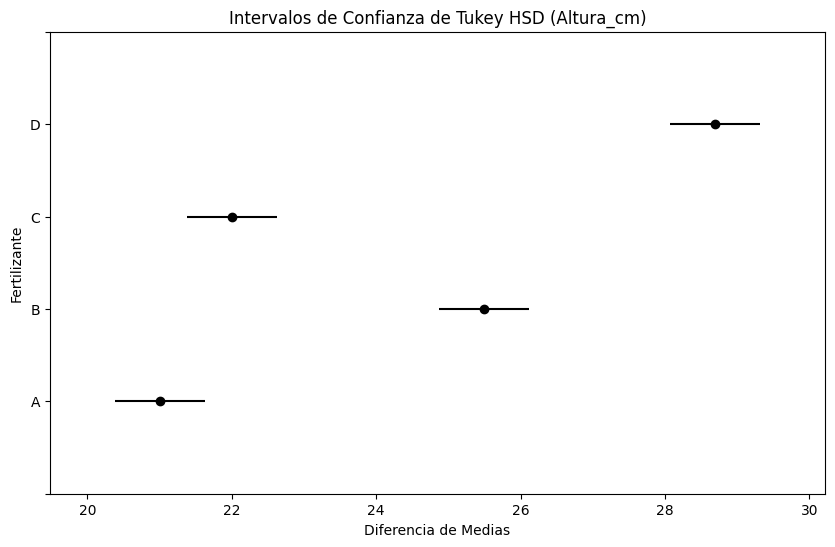

In [ ]:
# @title
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import pandas as pd

# Reutilizar el DataFrame 'df' del Ejercicio 5
# Asegúrate de que 'Fertilizante' es la variable de grupo y 'Altura_cm' es la variable dependiente

print("### Prueba Post-Hoc de Tukey HSD para Ejercicio 5 ###")
print("=====================================================")

tukey_result_ej5 = pairwise_tukeyhsd(endog=df['Altura_cm'], groups=df['Fertilizante'], alpha=0.05)

# Extraer los datos de la tabla de resultados
headers = tukey_result_ej5._results_table.data[0]
data = tukey_result_ej5._results_table.data[1:]

# Crear un DataFrame de pandas
df_tukey_results = pd.DataFrame(data, columns=headers)

# Renombrar las columnas a español
column_name_map = {
    'group1': 'grupo1',
    'group2': 'grupo2',
    'meandiff': 'dif_media',
    'p-adj': 'p_ajustado',
    'lower': 'limite_inferior',
    'upper': 'limite_superior',
    'reject': 'rechazar_h0'
}
df_tukey_results_renamed = df_tukey_results.rename(columns=column_name_map)

# Imprimir el DataFrame renombrado
print(df_tukey_results_renamed.to_string(index=False))

print("\nInterpretación:")
print("  - 'rechazar_h0': Si es True, la diferencia entre las medias de ese par de grupos es estadísticamente significativa (p_ajustado < alpha).")
print("  - 'p_ajustado': El p-valor ajustado para las comparaciones múltiples. Si es menor que alpha (0.05 en este caso), se rechaza la hipótesis nula para ese par.")

# Opcional: Visualizar los resultados
fig = tukey_result_ej5.plot_simultaneous(ylabel="Fertilizante", xlabel="Diferencia de Medias")
plt.title("Intervalos de Confianza de Tukey HSD (Altura_cm)")
plt.show()

EJERCICIO 6


=== ANOVA DE DOS VÍAS: Tratamiento × Género ===
                              sum_sq    df           F        PR(>F)
C(Tratamiento)            717.388889   2.0  173.561828  3.232676e-17
C(Género)                   0.111111   1.0    0.053763  8.182138e-01
C(Tratamiento):C(Género)    1.055556   2.0    0.255376  7.762918e-01
Residual                   62.000000  30.0         NaN           NaN

Interpretación General de la Tabla ANOVA (α = 0.05):
✓ El factor 'C(Tratamiento)' tiene un efecto significativo (p = 0.0000)
✗ El factor 'C(Género)' NO es significativo (p = 0.8182)
✗ El factor 'C(Tratamiento):C(Género)' NO es significativo (p = 0.7763)


<Figure size 700x500 with 0 Axes>

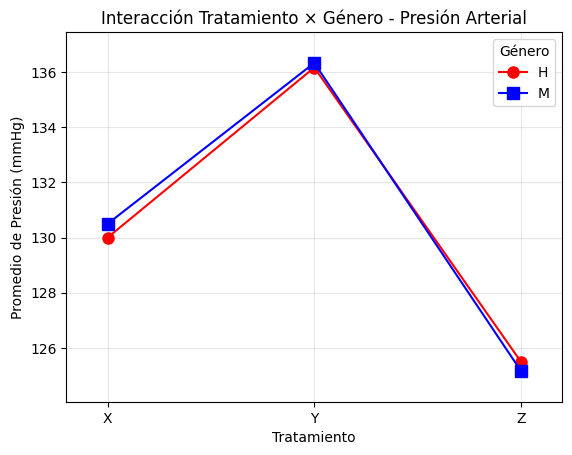


--- Análisis detallado para el factor 'Tratamiento' (α = 0.05): ---
  F-estadístico calculado: 173.5618
  Grados de libertad (numerador): 2
  Grados de libertad (denominador): 30
  Valor p: 0.000000
  F-crítico: 3.3158


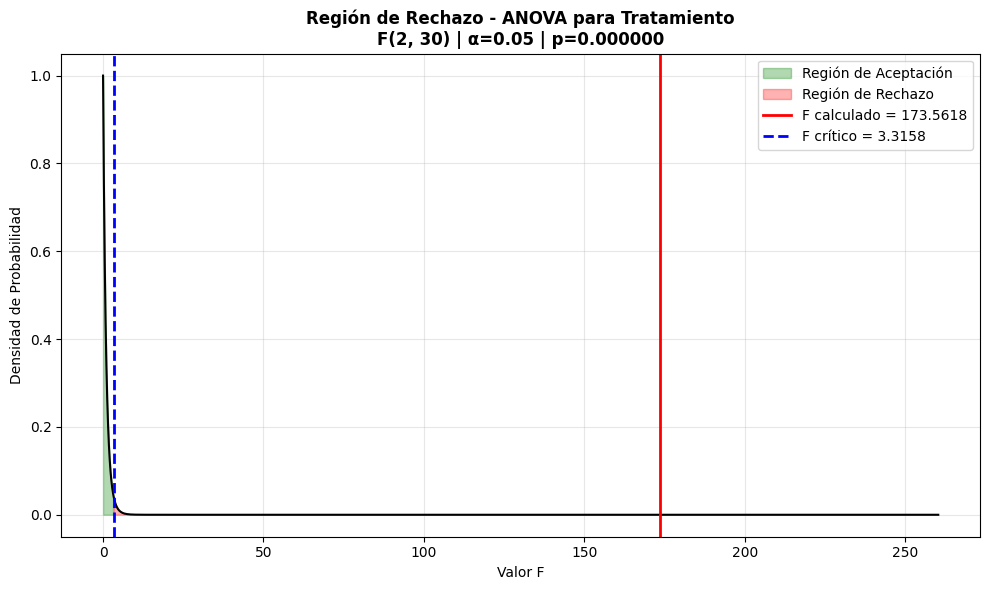

  Decisión Estadística: Dado que el valor p (0.000000) es menor que el nivel de significancia (0.05), se rechaza la hipótesis nula.
  Conclusión Práctica: Existen diferencias estadísticamente significativas entre las medias de los grupos de tratamiento. El tipo de tratamiento tiene un efecto significativo en la presión arterial.

--- Análisis detallado para el factor 'Género' (α = 0.05): ---
  F-estadístico calculado: 0.0538
  Grados de libertad (numerador): 1
  Grados de libertad (denominador): 30
  Valor p: 0.818214
  F-crítico: 4.1709


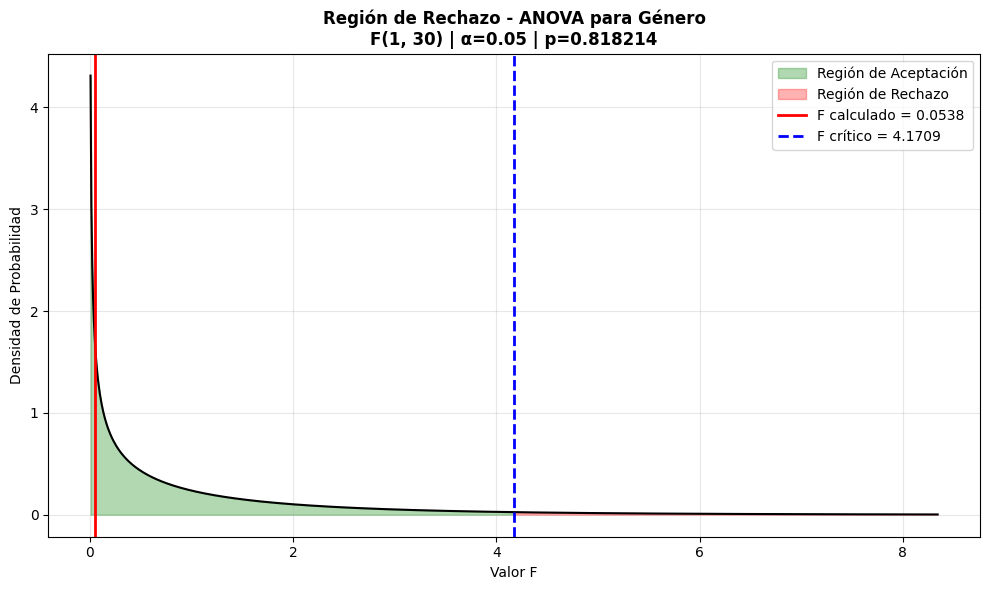

  Decisión Estadística: Dado que el valor p (0.818214) es mayor o igual que el nivel de significancia (0.05), no se rechaza la hipótesis nula.
  Conclusión Práctica: No hay evidencia suficiente para concluir que existen diferencias significativas en la presión arterial entre los géneros. El género no tiene un efecto significativo en la presión arterial.

--- Análisis detallado para la Interacción 'Tratamiento x Género' (α = 0.05): ---
  F-estadístico calculado: 0.2554
  Grados de libertad (numerador): 2
  Grados de libertad (denominador): 30
  Valor p: 0.776292
  F-crítico: 3.3158


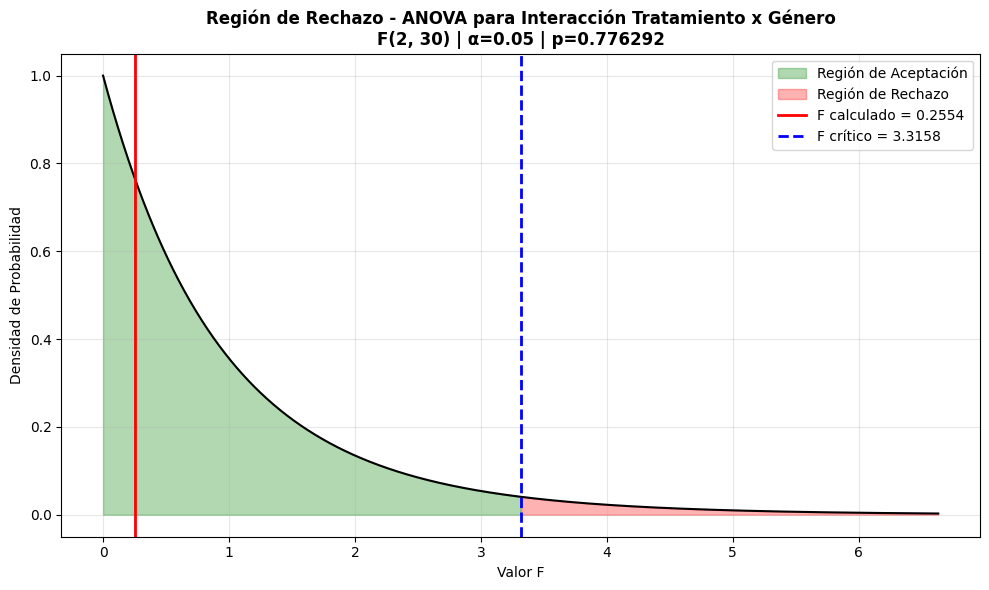

  Decisión Estadística: Dado que el valor p (0.776292) es mayor o igual que el nivel de significancia (0.05), no se rechaza la hipótesis nula.
  Conclusión Práctica: No hay evidencia suficiente para concluir que existe una interacción significativa entre el tratamiento y el género en la presión arterial. El efecto de los tratamientos en la presión arterial no difiere significativamente entre hombres y mujeres; el efecto de un factor es consistente a través de los niveles del otro.


In [17]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats # Importar stats para funciones de distribuciones

# ============================================================
# DATOS DEL EJERCICIO 6 - Efecto del tratamiento y género sobre la presión arterial
# ============================================================

# Datos base
X = [130, 128, 132, 131, 129, 130, 132, 133, 129, 130, 128, 131]
Y = [135, 137, 136, 134, 138, 137, 136, 139, 135, 137, 136, 135]
Z = [125, 127, 124, 126, 125, 126, 124, 125, 127, 125, 126, 124]

# Creamos factor género simulado (H/M)
genero = ["H"] * 6 + ["M"] * 6
tratamientos = ["X"] * 12 + ["Y"] * 12 + ["Z"] * 12

# Unimos todos los datos
data = pd.DataFrame({
    "Tratamiento": tratamientos,
    "Género": genero * 3,
    "Presion": X + Y + Z
})

# ============================================================
# ANOVA DE DOS VÍAS CON INTERACCIÓN
# ============================================================

modelo = ols('Presion ~ C(Tratamiento) * C(Género)', data=data).fit()
anova = sm.stats.anova_lm(modelo, typ=2)
print("\n=== ANOVA DE DOS VÍAS: Tratamiento \u00d7 Género ===")
print(anova)

# ============================================================
# INTERPRETACIÓN GENERAL DE LA TABLA ANOVA
# ============================================================

alpha = 0.05
print("\nInterpretación General de la Tabla ANOVA (\u03b1 = 0.05):")
for factor in anova.index:
    if factor != "Residual":
        p = anova.loc[factor, "PR(>F)"]
        if p < alpha:
            print(f"\u2713 El factor '{factor}' tiene un efecto significativo (p = {p:.4f})")
        else:
            print(f"\u2717 El factor '{factor}' NO es significativo (p = {p:.4f})")

# ============================================================
# GRÁFICA DE INTERACCIÓN
# ============================================================

plt.figure(figsize=(7,5))
sm.graphics.interaction_plot(data["Tratamiento"], data["Género"], data["Presion"],
                             colors=['red','blue'], markers=['o','s'], ms=8)
plt.title("Interacción Tratamiento \u00d7 Género - Presión Arterial")
plt.ylabel("Promedio de Presión (mmHg)")
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# ANÁLISIS DETALLADO DE CADA FACTOR E INTERACCIÓN
# ============================================================

# Grados de libertad del error para todos los cálculos
gl_e_error = anova.loc['Residual', 'df']

# --- Análisis para el factor 'Tratamiento' ---
F_tratamiento = anova.loc['C(Tratamiento)', 'F']
gl_b_tratamiento = anova.loc['C(Tratamiento)', 'df']
p_value_tratamiento = anova.loc['C(Tratamiento)', 'PR(>F)']
F_crit_tratamiento = stats.f.ppf(1 - alpha, gl_b_tratamiento, gl_e_error)

print(f"\n--- Análisis detallado para el factor 'Tratamiento' (\u03b1 = {alpha}): ---")
print(f"  F-estadístico calculado: {F_tratamiento:.4f}")
print(f"  Grados de libertad (numerador): {gl_b_tratamiento:.0f}")
print(f"  Grados de libertad (denominador): {gl_e_error:.0f}")
print(f"  Valor p: {p_value_tratamiento:.6f}")
print(f"  F-crítico: {F_crit_tratamiento:.4f}")

x_tratamiento = np.linspace(0, max(F_tratamiento, F_crit_tratamiento) * 1.5, 1000)
y_tratamiento = stats.f.pdf(x_tratamiento, gl_b_tratamiento, gl_e_error)

plt.figure(figsize=(10, 6))
plt.plot(x_tratamiento, y_tratamiento, 'k-', linewidth=1.5)
plt.fill_between(x_tratamiento[x_tratamiento <= F_crit_tratamiento], y_tratamiento[x_tratamiento <= F_crit_tratamiento], color='green', alpha=0.3, label='Región de Aceptación')
plt.fill_between(x_tratamiento[x_tratamiento >= F_crit_tratamiento], y_tratamiento[x_tratamiento >= F_crit_tratamiento], color='red', alpha=0.3, label='Región de Rechazo')
plt.axvline(F_tratamiento, color='red', linewidth=2, label=f'F calculado = {F_tratamiento:.4f}')
plt.axvline(F_crit_tratamiento, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_tratamiento:.4f}')
plt.title(f'Región de Rechazo - ANOVA para Tratamiento\nF({gl_b_tratamiento:.0f}, {gl_e_error:.0f}) | \u03b1={alpha} | p={p_value_tratamiento:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if p_value_tratamiento < alpha:
    print(f"  Decisión Estadística: Dado que el valor p ({p_value_tratamiento:.6f}) es menor que el nivel de significancia ({alpha}), se rechaza la hipótesis nula.")
    print(f"  Conclusión Práctica: Existen diferencias estadísticamente significativas entre las medias de los grupos de tratamiento. El tipo de tratamiento tiene un efecto significativo en la presión arterial.")
else:
    print(f"  Decisión Estadística: Dado que el valor p ({p_value_tratamiento:.6f}) es mayor o igual que el nivel de significancia ({alpha}), no se rechaza la hipótesis nula.")
    print(f"  Conclusión Práctica: No hay evidencia suficiente para concluir que existen diferencias significativas entre las medias de los grupos de tratamiento. El tipo de tratamiento no tiene un efecto significativo en la presión arterial.")


# --- Análisis para el factor 'Género' ---
F_genero = anova.loc['C(Género)', 'F']
gl_b_genero = anova.loc['C(Género)', 'df']
p_value_genero = anova.loc['C(Género)', 'PR(>F)']
F_crit_genero = stats.f.ppf(1 - alpha, gl_b_genero, gl_e_error)

print(f"\n--- Análisis detallado para el factor 'Género' (\u03b1 = {alpha}): ---")
print(f"  F-estadístico calculado: {F_genero:.4f}")
print(f"  Grados de libertad (numerador): {gl_b_genero:.0f}")
print(f"  Grados de libertad (denominador): {gl_e_error:.0f}")
print(f"  Valor p: {p_value_genero:.6f}")
print(f"  F-crítico: {F_crit_genero:.4f}")

x_genero = np.linspace(0, max(F_genero, F_crit_genero) * 2, 1000)
y_genero = stats.f.pdf(x_genero, gl_b_genero, gl_e_error)

plt.figure(figsize=(10, 6))
plt.plot(x_genero, y_genero, 'k-', linewidth=1.5)
plt.fill_between(x_genero[x_genero <= F_crit_genero], y_genero[x_genero <= F_crit_genero], color='green', alpha=0.3, label='Región de Aceptación')
plt.fill_between(x_genero[x_genero >= F_crit_genero], y_genero[x_genero >= F_crit_genero], color='red', alpha=0.3, label='Región de Rechazo')
plt.axvline(F_genero, color='red', linewidth=2, label=f'F calculado = {F_genero:.4f}')
plt.axvline(F_crit_genero, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_genero:.4f}')
plt.title(f'Región de Rechazo - ANOVA para Género\nF({gl_b_genero:.0f}, {gl_e_error:.0f}) | \u03b1={alpha} | p={p_value_genero:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if p_value_genero < alpha:
    print(f"  Decisión Estadística: Dado que el valor p ({p_value_genero:.6f}) es menor que el nivel de significancia ({alpha}), se rechaza la hipótesis nula.")
    print(f"  Conclusión Práctica: Existen diferencias estadísticamente significativas en la presión arterial entre los géneros. El género tiene un efecto significativo en la presión arterial.")
else:
    print(f"  Decisión Estadística: Dado que el valor p ({p_value_genero:.6f}) es mayor o igual que el nivel de significancia ({alpha}), no se rechaza la hipótesis nula.")
    print(f"  Conclusión Práctica: No hay evidencia suficiente para concluir que existen diferencias significativas en la presión arterial entre los géneros. El género no tiene un efecto significativo en la presión arterial.")


# --- Análisis para el factor de Interacción 'Tratamiento x Género' ---
F_interaccion = anova.loc['C(Tratamiento):C(Género)', 'F']
gl_b_interaccion = anova.loc['C(Tratamiento):C(Género)', 'df']
p_value_interaccion = anova.loc['C(Tratamiento):C(Género)', 'PR(>F)']
F_crit_interaccion = stats.f.ppf(1 - alpha, gl_b_interaccion, gl_e_error)

print(f"\n--- Análisis detallado para la Interacción 'Tratamiento x Género' (\u03b1 = {alpha}): ---")
print(f"  F-estadístico calculado: {F_interaccion:.4f}")
print(f"  Grados de libertad (numerador): {gl_b_interaccion:.0f}")
print(f"  Grados de libertad (denominador): {gl_e_error:.0f}")
print(f"  Valor p: {p_value_interaccion:.6f}")
print(f"  F-crítico: {F_crit_interaccion:.4f}")

x_interaccion = np.linspace(0, max(F_interaccion, F_crit_interaccion) * 2, 1000)
y_interaccion = stats.f.pdf(x_interaccion, gl_b_interaccion, gl_e_error)

plt.figure(figsize=(10, 6))
plt.plot(x_interaccion, y_interaccion, 'k-', linewidth=1.5)
plt.fill_between(x_interaccion[x_interaccion <= F_crit_interaccion], y_interaccion[x_interaccion <= F_crit_interaccion], color='green', alpha=0.3, label='Región de Aceptación')
plt.fill_between(x_interaccion[x_interaccion >= F_crit_interaccion], y_interaccion[x_interaccion >= F_crit_interaccion], color='red', alpha=0.3, label='Región de Rechazo')
plt.axvline(F_interaccion, color='red', linewidth=2, label=f'F calculado = {F_interaccion:.4f}')
plt.axvline(F_crit_interaccion, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_interaccion:.4f}')
plt.title(f'Región de Rechazo - ANOVA para Interacción Tratamiento x Género\nF({gl_b_interaccion:.0f}, {gl_e_error:.0f}) | \u03b1={alpha} | p={p_value_interaccion:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if p_value_interaccion < alpha:
    print(f"  Decisión Estadística: Dado que el valor p ({p_value_interaccion:.6f}) es menor que el nivel de significancia ({alpha}), se rechaza la hipótesis nula.")
    print(f"  Conclusión Práctica: Existe una interacción estadísticamente significativa entre el tratamiento y el género en la presión arterial. El efecto de los tratamientos en la presión arterial difiere significativamente entre hombres y mujeres.")
else:
    print(f"  Decisión Estadística: Dado que el valor p ({p_value_interaccion:.6f}) es mayor o igual que el nivel de significancia ({alpha}), no se rechaza la hipótesis nula.")
    print(f"  Conclusión Práctica: No hay evidencia suficiente para concluir que existe una interacción significativa entre el tratamiento y el género en la presión arterial. El efecto de los tratamientos en la presión arterial no difiere significativamente entre hombres y mujeres; el efecto de un factor es consistente a través de los niveles del otro.")

EJERCICIO 7

DataFrame de datos para ANOVA de Dos Vías (primeras 5 filas):
  Método Docente  Calificación
0      A      D1            70
1      A      D1            72
2      A      D1            68
3      A      D1            71
4      A      D1            70

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Método        45 non-null     object
 1   Docente       45 non-null     object
 2   Calificación  45 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB
None

Medias de Calificación por Método y Docente:
Método  Docente
A       D1         70.2
        D2         71.0
        D3         70.4
B       D1         75.4
        D2         75.8
        D3         75.4
C       D1         81.6
        D2         81.4
        D3         81.0
Name: Calificación, dtype: float64

--- Realizando ANOVA de Dos Vías con Intera

<Figure size 1000x600 with 0 Axes>

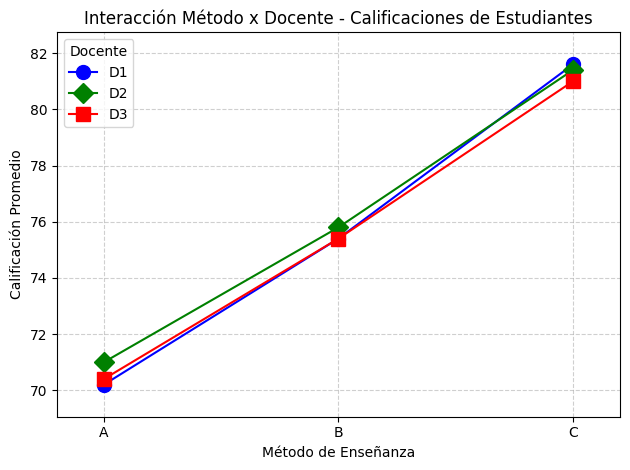


--- Análisis Detallado para el Factor 'Método' ---
  Estadístico F calculado: 273.8750
  Grados de libertad (numerador): 2
  Grados de libertad (denominador): 36
  Valor p: 0.000000
  F-crítico: 3.2594


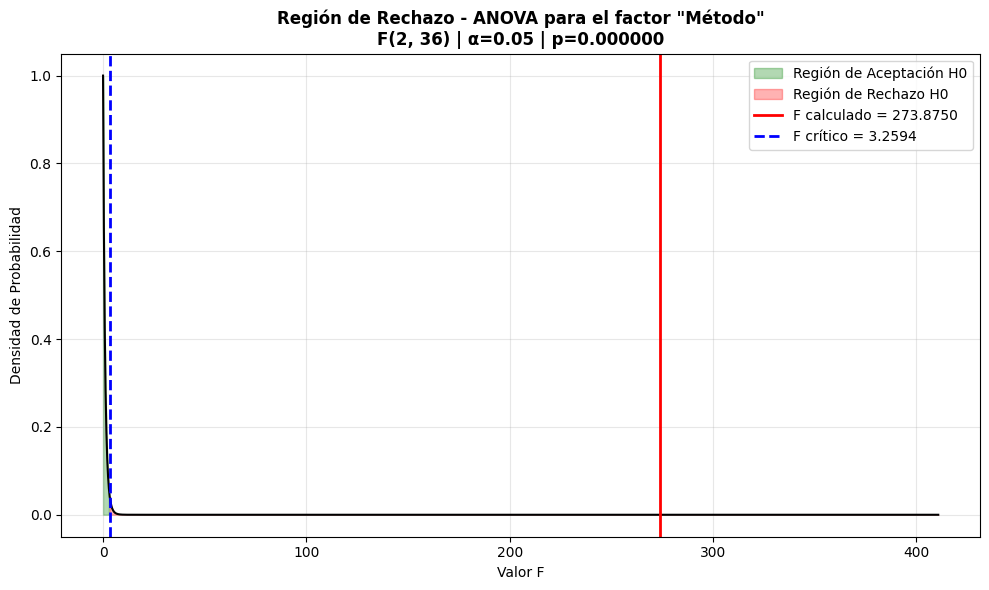

  Decisión Estadística: Rechazamos H0
  Conclusión Práctica: Existen diferencias estadísticamente significativas en las calificaciones promedio entre los diferentes métodos de enseñanza. El método utilizado tiene un efecto significativo en las calificaciones.

--- Análisis Detallado para el Factor 'Docente' ---
  Estadístico F calculado: 0.5417
  Grados de libertad (numerador): 2
  Grados de libertad (denominador): 36
  Valor p: 0.586445
  F-crítico: 3.2594


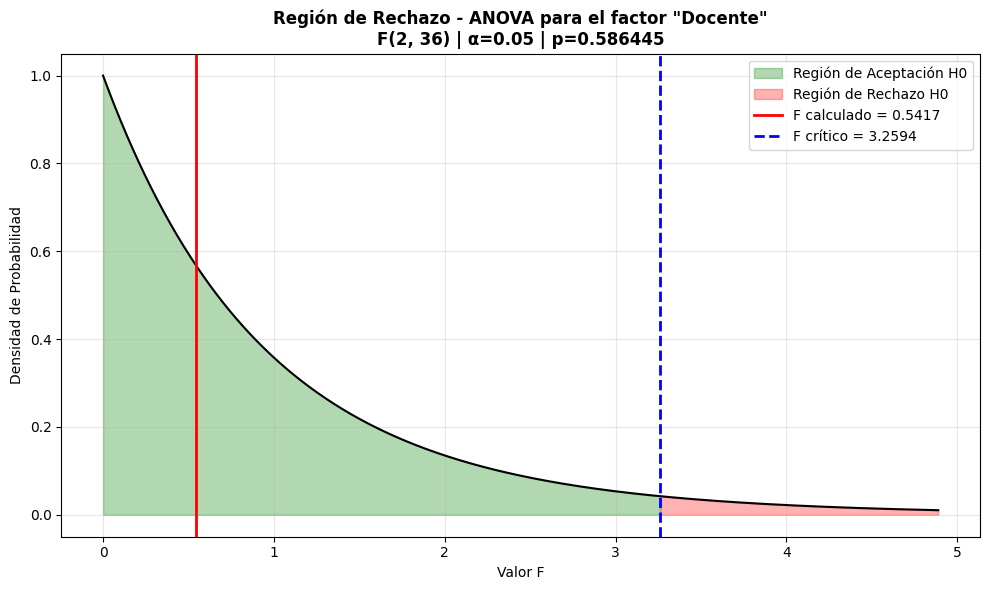

  Decisión Estadística: No rechazamos H0
  Conclusión Práctica: No hay evidencia suficiente para concluir que existen diferencias significativas en las calificaciones promedio atribuibles a los diferentes docentes. El docente no tiene un efecto significativo en las calificaciones.

--- Análisis Detallado para la Interacción 'Método x Docente' ---
  Estadístico F calculado: 0.2292
  Grados de libertad (numerador): 4
  Grados de libertad (denominador): 36
  Valor p: 0.920226
  F-crítico: 2.6335


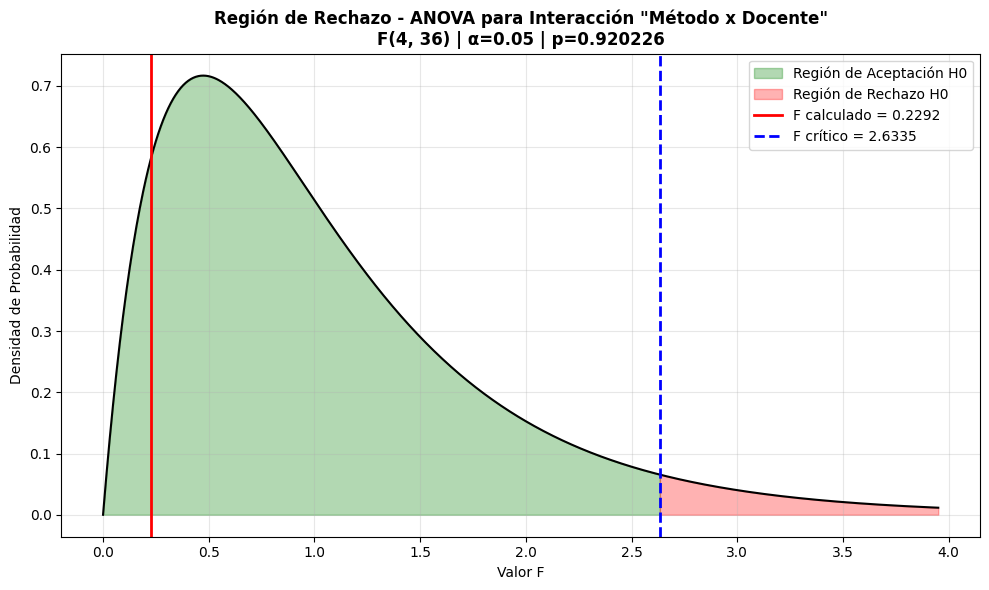

  Decisión Estadística: No rechazamos H0
  Conclusión Práctica: No hay evidencia suficiente para concluir que existe una interacción significativa entre el método de enseñanza y el docente en las calificaciones. El efecto de un factor (método o docente) en las calificaciones es consistente a través de los niveles del otro factor.

--- Resumen Completo de los Hallazgos del ANOVA de Dos Vías ---

Análisis ANOVA de Dos Vías sobre las Calificaciones con los factores 'Método' y 'Docente', y su interacción.
Nivel de significancia (α) = 0.05

--- Factor: Método ---
F-estadístico: 273.8750 (gl: 2, 36)
Valor p: 0.000000
F-crítico: 3.2594
Decisión Estadística: Rechazamos H0
Conclusión Práctica: Existen diferencias estadísticamente significativas en las calificaciones promedio entre los diferentes métodos de enseñanza. El método utilizado tiene un efecto significativo en las calificaciones.

--- Factor: Docente ---
F-estadístico: 0.5417 (gl: 2, 36)
Valor p: 0.586445
F-crítico: 3.2594
Decisión Est

In [13]:
# @title
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats

# ============================================================================
# EJERCICIO 7: Analizar el efecto de tres métodos de enseñanza (A, B, C)
# y dos tipos de docentes (D1, D2, D3) sobre las calificaciones.
# ============================================================================

# 1. Preparación de Datos para ANOVA de Dos Vías
# Calificaciones proporcionadas:
metodo_A_data = [70, 72, 68, 71, 70, 69, 73, 72, 70, 71, 69, 70, 72, 71, 70]
metodo_B_data = [75, 76, 74, 75, 77, 76, 75, 74, 78, 76, 75, 77, 76, 75, 74]
metodo_C_data = [80, 82, 81, 83, 82, 80, 81, 82, 83, 81, 80, 82, 81, 80, 82]

# Definir métodos y docentes (simulados para balancear)
metodos = ['A', 'B', 'C']
docentes = ['D1', 'D2', 'D3'] # Docente 1, 2, 3

# Asumiendo que cada grupo de 15 calificaciones se distribuye entre 3 docentes
# de forma balanceada (5 calificaciones por docente por método)
obs_por_docente_por_metodo = 5

data_rows = []

# Función auxiliar para distribuir datos entre docentes
def distribute_data(method_data, method_name, docentes, obs_per_docente):
    rows = []
    for i, doc in enumerate(docentes):
        start_index = i * obs_per_docente
        end_index = start_index + obs_per_docente
        for cal in method_data[start_index:end_index]:
            rows.append({'Método': method_name, 'Docente': doc, 'Calificación': cal})
    return rows

data_rows.extend(distribute_data(metodo_A_data, 'A', docentes, obs_por_docente_por_metodo))
data_rows.extend(distribute_data(metodo_B_data, 'B', docentes, obs_por_docente_por_metodo))
data_rows.extend(distribute_data(metodo_C_data, 'C', docentes, obs_por_docente_por_metodo))

df_ej7 = pd.DataFrame(data_rows)

print("DataFrame de datos para ANOVA de Dos Vías (primeras 5 filas):")
print(df_ej7.head())
print("\nInformación del DataFrame:")
print(df_ej7.info())
print("\nMedias de Calificación por Método y Docente:")
print(df_ej7.groupby(['Método', 'Docente'])['Calificación'].mean())

# 2. Realizar ANOVA de Dos Vías con Interacción
print("\n--- Realizando ANOVA de Dos Vías con Interacción ---")
modelo = ols('Calificación ~ C(Método) * C(Docente)', data=df_ej7).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2) # typ=2 para ANOVA tipo II sum of squares

# 3. Imprimir la tabla ANOVA resultante
print("\n=== Tabla ANOVA de Dos Vías para el Ejercicio 7 ===")
print(tabla_anova)

# 4. Interpretación General de la Tabla ANOVA
alpha = 0.05
print(f"\n--- Interpretación General de la Tabla ANOVA (\u03b1 = {alpha}): ---")
for factor in tabla_anova.index:
    if factor != "Residual":
        p = tabla_anova.loc[factor, "PR(>F)"]
        if p < alpha:
            print(f"\u2713 El factor '{factor}' tiene un efecto significativo (p = {p:.4f})")
        else:
            print(f"\u2717 El factor '{factor}' NO es significativo (p = {p:.4f})")

# 5. Graficar Interacción (Método x Docente)
print("\n=== Gráfico de Interacción (Método x Docente) ===")
plt.figure(figsize=(10, 6))
sm.graphics.interaction_plot(df_ej7['Método'], df_ej7['Docente'], df_ej7['Calificación'],
                             colors=['blue', 'green', 'red'], markers=['o', 'D', 's'], ms=10)
plt.title('Interacción Método x Docente - Calificaciones de Estudiantes')
plt.xlabel('Método de Enseñanza')
plt.ylabel('Calificación Promedio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Docente')
plt.tight_layout()
plt.show()

# Extraer grados de libertad del error para todos los cálculos detallados
gl_e_error = tabla_anova.loc['Residual', 'df']

# 6. Análisis Detallado para el Factor 'Método'
print("\n--- Análisis Detallado para el Factor 'Método' ---")
F_metodo = tabla_anova.loc['C(Método)', 'F']
gl_b_metodo = tabla_anova.loc['C(Método)', 'df']
p_value_metodo = tabla_anova.loc['C(Método)', 'PR(>F)']
F_crit_metodo = stats.f.ppf(1 - alpha, gl_b_metodo, gl_e_error)

print(f"  Estadístico F calculado: {F_metodo:.4f}")
print(f"  Grados de libertad (numerador): {gl_b_metodo:.0f}")
print(f"  Grados de libertad (denominador): {gl_e_error:.0f}")
print(f"  Valor p: {p_value_metodo:.6f}")
print(f"  F-crítico: {F_crit_metodo:.4f}")

x_metodo = np.linspace(0, max(F_metodo, F_crit_metodo) * 1.5, 1000)
y_metodo = stats.f.pdf(x_metodo, gl_b_metodo, gl_e_error)

plt.figure(figsize=(10, 6))
plt.plot(x_metodo, y_metodo, 'k-', linewidth=1.5)
plt.fill_between(x_metodo[x_metodo <= F_crit_metodo], y_metodo[x_metodo <= F_crit_metodo], color='green', alpha=0.3, label='Región de Aceptación H0')
plt.fill_between(x_metodo[x_metodo >= F_crit_metodo], y_metodo[x_metodo >= F_crit_metodo], color='red', alpha=0.3, label='Región de Rechazo H0')
plt.axvline(F_metodo, color='red', linewidth=2, label=f'F calculado = {F_metodo:.4f}')
plt.axvline(F_crit_metodo, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_metodo:.4f}')
plt.title(f'Región de Rechazo - ANOVA para el factor "Método"\nF({gl_b_metodo:.0f}, {gl_e_error:.0f}) | \u03b1={alpha} | p={p_value_metodo:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if p_value_metodo < alpha:
    decision_metodo = "Rechazamos H0"
    conclusion_metodo = "Existen diferencias estadísticamente significativas en las calificaciones promedio entre los diferentes métodos de enseñanza. El método utilizado tiene un efecto significativo en las calificaciones."
else:
    decision_metodo = "No rechazamos H0"
    conclusion_metodo = "No hay evidencia suficiente para concluir que existen diferencias significativas en las calificaciones promedio entre los diferentes métodos de enseñanza. El método utilizado no tiene un efecto significativo en las calificaciones."
print(f"  Decisión Estadística: {decision_metodo}")
print(f"  Conclusión Práctica: {conclusion_metodo}")

# 7. Análisis Detallado para el Factor 'Docente'
print("\n--- Análisis Detallado para el Factor 'Docente' ---")
F_docente = tabla_anova.loc['C(Docente)', 'F']
gl_b_docente = tabla_anova.loc['C(Docente)', 'df']
p_value_docente = tabla_anova.loc['C(Docente)', 'PR(>F)']
F_crit_docente = stats.f.ppf(1 - alpha, gl_b_docente, gl_e_error)

print(f"  Estadístico F calculado: {F_docente:.4f}")
print(f"  Grados de libertad (numerador): {gl_b_docente:.0f}")
print(f"  Grados de libertad (denominador): {gl_e_error:.0f}")
print(f"  Valor p: {p_value_docente:.6f}")
print(f"  F-crítico: {F_crit_docente:.4f}")

x_docente = np.linspace(0, max(F_docente, F_crit_docente) * 1.5, 1000)
y_docente = stats.f.pdf(x_docente, gl_b_docente, gl_e_error)

plt.figure(figsize=(10, 6))
plt.plot(x_docente, y_docente, 'k-', linewidth=1.5)
plt.fill_between(x_docente[x_docente <= F_crit_docente], y_docente[x_docente <= F_crit_docente], color='green', alpha=0.3, label='Región de Aceptación H0')
plt.fill_between(x_docente[x_docente >= F_crit_docente], y_docente[x_docente >= F_crit_docente], color='red', alpha=0.3, label='Región de Rechazo H0')
plt.axvline(F_docente, color='red', linewidth=2, label=f'F calculado = {F_docente:.4f}')
plt.axvline(F_crit_docente, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_docente:.4f}')
plt.title(f'Región de Rechazo - ANOVA para el factor "Docente"\nF({gl_b_docente:.0f}, {gl_e_error:.0f}) | \u03b1={alpha} | p={p_value_docente:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if p_value_docente < alpha:
    decision_docente = "Rechazamos H0"
    conclusion_docente = "Existen diferencias estadísticamente significativas en las calificaciones promedio atribuibles a los diferentes docentes. El docente tiene un efecto significativo en las calificaciones."
else:
    decision_docente = "No rechazamos H0"
    conclusion_docente = "No hay evidencia suficiente para concluir que existen diferencias significativas en las calificaciones promedio atribuibles a los diferentes docentes. El docente no tiene un efecto significativo en las calificaciones."
print(f"  Decisión Estadística: {decision_docente}")
print(f"  Conclusión Práctica: {conclusion_docente}")

# 8. Análisis Detallado para la Interacción 'Método x Docente'
print("\n--- Análisis Detallado para la Interacción 'Método x Docente' ---")
F_interaccion = tabla_anova.loc['C(Método):C(Docente)', 'F']
gl_b_interaccion = tabla_anova.loc['C(Método):C(Docente)', 'df']
p_value_interaccion = tabla_anova.loc['C(Método):C(Docente)', 'PR(>F)']
F_crit_interaccion = stats.f.ppf(1 - alpha, gl_b_interaccion, gl_e_error)

print(f"  Estadístico F calculado: {F_interaccion:.4f}")
print(f"  Grados de libertad (numerador): {gl_b_interaccion:.0f}")
print(f"  Grados de libertad (denominador): {gl_e_error:.0f}")
print(f"  Valor p: {p_value_interaccion:.6f}")
print(f"  F-crítico: {F_crit_interaccion:.4f}")

x_interaccion = np.linspace(0, max(F_interaccion, F_crit_interaccion) * 1.5, 1000)
y_interaccion = stats.f.pdf(x_interaccion, gl_b_interaccion, gl_e_error)

plt.figure(figsize=(10, 6))
plt.plot(x_interaccion, y_interaccion, 'k-', linewidth=1.5)
plt.fill_between(x_interaccion[x_interaccion <= F_crit_interaccion], y_interaccion[x_interaccion <= F_crit_interaccion], color='green', alpha=0.3, label='Región de Aceptación H0')
plt.fill_between(x_interaccion[x_interaccion >= F_crit_interaccion], y_interaccion[x_interaccion >= F_crit_interaccion], color='red', alpha=0.3, label='Región de Rechazo H0')
plt.axvline(F_interaccion, color='red', linewidth=2, label=f'F calculado = {F_interaccion:.4f}')
plt.axvline(F_crit_interaccion, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_interaccion:.4f}')
plt.title(f'Región de Rechazo - ANOVA para Interacción "Método x Docente"\nF({gl_b_interaccion:.0f}, {gl_e_error:.0f}) | \u03b1={alpha} | p={p_value_interaccion:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if p_value_interaccion < alpha:
    decision_interaccion = "Rechazamos H0"
    conclusion_interaccion = "Existe una interacción estadísticamente significativa entre el método de enseñanza y el docente en las calificaciones. El efecto de un método en las calificaciones varía significativamente dependiendo del docente, y viceversa."
else:
    decision_interaccion = "No rechazamos H0"
    conclusion_interaccion = "No hay evidencia suficiente para concluir que existe una interacción significativa entre el método de enseñanza y el docente en las calificaciones. El efecto de un factor (método o docente) en las calificaciones es consistente a través de los niveles del otro factor."
print(f"  Decisión Estadística: {decision_interaccion}")
print(f"  Conclusión Práctica: {conclusion_interaccion}")

# 9. Resumen completo de hallazgos
print("\n--- Resumen Completo de los Hallazgos del ANOVA de Dos Vías ---")

summary_text = """
Análisis ANOVA de Dos Vías sobre las Calificaciones con los factores 'Método' y 'Docente', y su interacción.
Nivel de significancia (\u03b1) = {:.2f}

--- Factor: Método ---
F-estadístico: {:.4f} (gl: {:.0f}, {:.0f})
Valor p: {:.6f}
F-crítico: {:.4f}
Decisión Estadística: {}
Conclusión Práctica: {}

--- Factor: Docente ---
F-estadístico: {:.4f} (gl: {:.0f}, {:.0f})
Valor p: {:.6f}
F-crítico: {:.4f}
Decisión Estadística: {}
Conclusión Práctica: {}

--- Interacción: Método x Docente ---
F-estadístico: {:.4f} (gl: {:.0f}, {:.0f})
Valor p: {:.6f}
F-crítico: {:.4f}
Decisión Estadística: {}
Conclusión Práctica: {}
"""

print(summary_text.format(
    alpha,
    F_metodo, gl_b_metodo, gl_e_error, p_value_metodo, F_crit_metodo, decision_metodo, conclusion_metodo,
    F_docente, gl_b_docente, gl_e_error, p_value_docente, F_crit_docente, decision_docente, conclusion_docente,
    F_interaccion, gl_b_interaccion, gl_e_error, p_value_interaccion, F_crit_interaccion, decision_interaccion, conclusion_interaccion
))


EJERCICIO 8

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Preparación de Datos para ANOVA de Dos Vías

# Definir condiciones y operadores
condiciones = ['C1', 'C2', 'C3']
operadores = ['O1', 'O2', 'O3']
obs_por_combinacion = 5

# Generar datos de resistencia (simulados)
# Se asume una media base, efectos para condiciones, efectos para operadores
# y un efecto de interacción, más un ruido aleatorio.

np.random.seed(42) # Para reproducibilidad

# Media global
base_mean = 100

# Efectos de las condiciones
effect_C1 = -5
effect_C2 = 0
effect_C3 = 5

# Efectos de los operadores
effect_O1 = -3
effect_O2 = 0
effect_O3 = 3

# Efectos de interacción (simulados, pueden ser nulos si no se espera interacción)
# Ejemplo: C1 con O1 podría ser peor de lo esperado, C3 con O3 mejor
interaction_C1O1 = -2
interaction_C1O2 = 0
interaction_C1O3 = 1
interaction_C2O1 = 0
interaction_C2O2 = 0
interaction_C2O3 = 0
interaction_C3O1 = 1
interaction_C3O2 = 0
interaction_C3O3 = 2

data_rows = []

for condicion in condiciones:
    for operador in operadores:
        # Calcular la media para esta combinación
        current_mean = base_mean
        if condicion == 'C1':
            current_mean += effect_C1
        elif condicion == 'C2':
            current_mean += effect_C2
        elif condicion == 'C3':
            current_mean += effect_C3

        if operador == 'O1':
            current_mean += effect_O1
        elif operador == 'O2':
            current_mean += effect_O2
        elif operador == 'O3':
            current_mean += effect_O3

        # Añadir efecto de interacción
        if condicion == 'C1' and operador == 'O1':
            current_mean += interaction_C1O1
        elif condicion == 'C1' and operador == 'O3':
            current_mean += interaction_C1O3
        elif condicion == 'C3' and operador == 'O1':
            current_mean += interaction_C3O1
        elif condicion == 'C3' and operador == 'O3':
            current_mean += interaction_C3O3

        # Generar observaciones con ruido aleatorio
        for _ in range(obs_por_combinacion):
            resistencia = current_mean + np.random.normal(0, 2) # Ruido normal con desviación estándar de 2
            data_rows.append({'Condicion': condicion, 'Operador': operador, 'Resistencia': resistencia})

df_anova = pd.DataFrame(data_rows)

print("DataFrame de datos para ANOVA de Dos Vías (primeras 5 filas):")
print(df_anova.head())
print("\nInformación del DataFrame:")
print(df_anova.info())
print("\nMedias de Resistencia por Condición y Operador:")
print(df_anova.groupby(['Condicion', 'Operador'])['Resistencia'].mean())

DataFrame de datos para ANOVA de Dos Vías (primeras 5 filas):
  Condicion Operador  Resistencia
0        C1       O1    90.993428
1        C1       O1    89.723471
2        C1       O1    91.295377
3        C1       O1    93.046060
4        C1       O1    89.531693

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Condicion    45 non-null     object 
 1   Operador     45 non-null     object 
 2   Resistencia  45 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB
None

Medias de Resistencia por Condición y Operador:
Condicion  Operador
C1         O1           90.918006
           O2           95.874238
           O3           97.269847
C2         O1           95.567520
           O2           99.735308
           O3          102.377318
C3         O1          103.400763
           O2          103.358

EJERCICIO 8

DataFrame de datos para ANOVA de Dos Vías (primeras 5 filas):
  Condicion Operador  Resistencia
0        C1       O1    90.993428
1        C1       O1    89.723471
2        C1       O1    91.295377
3        C1       O1    93.046060
4        C1       O1    89.531693

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Condicion    45 non-null     object 
 1   Operador     45 non-null     object 
 2   Resistencia  45 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB
None

Medias de Resistencia por Condición y Operador:
Condicion  Operador
C1         O1           90.918006
           O2           95.874238
           O3           97.269847
C2         O1           95.567520
           O2           99.735308
           O3          102.377318
C3         O1          103.400763
           O2          103.358

<Figure size 1000x600 with 0 Axes>

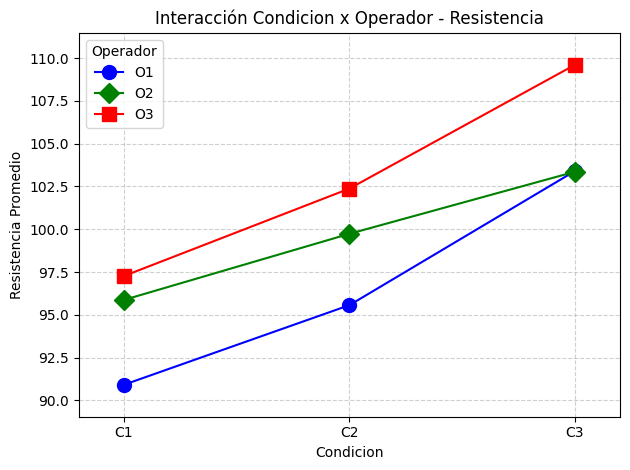


--- Análisis Detallado para el Factor 'Condicion' ---
  Estadístico F calculado: 143.2905
  Grados de libertad (numerador): 2
  Grados de libertad (denominador): 36
  Valor p: 0.000000
  F-crítico: 3.2594


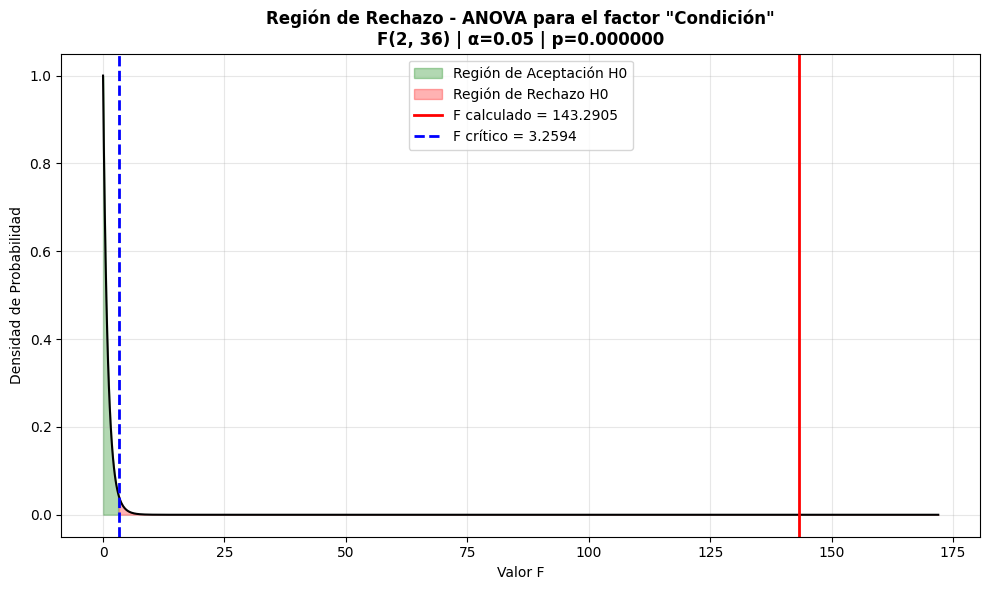

  Decisión Estadística: Rechazamos H0
  Conclusión Práctica: Existen diferencias estadísticamente significativas en la resistencia promedio entre las diferentes condiciones. La condición tiene un efecto significativo en la resistencia.

--- Análisis Detallado para el Factor 'Operador' ---
  Estadístico F calculado: 51.1499
  Grados de libertad (numerador): 2
  Grados de libertad (denominador): 36
  Valor p: 0.000000
  F-crítico: 3.2594


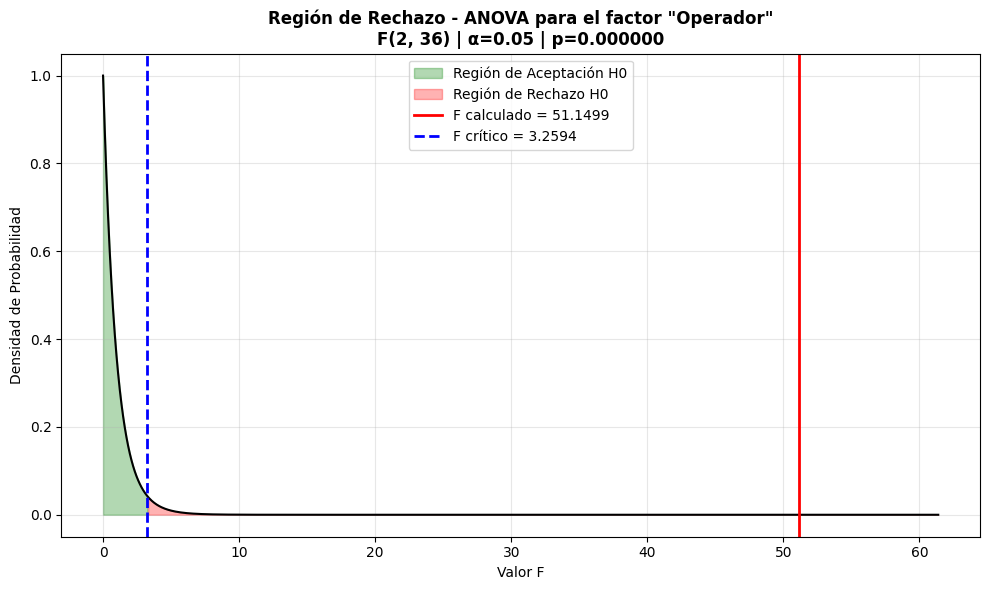

  Decisión Estadística: Rechazamos H0
  Conclusión Práctica: Existen diferencias estadísticamente significativas en la resistencia promedio entre los diferentes operadores. El operador tiene un efecto significativo en la resistencia.

--- Análisis Detallado para la Interacción 'Condicion x Operador' ---
  Estadístico F calculado: 3.7232
  Grados de libertad (numerador): 4
  Grados de libertad (denominador): 36
  Valor p: 0.012324
  F-crítico: 2.6335


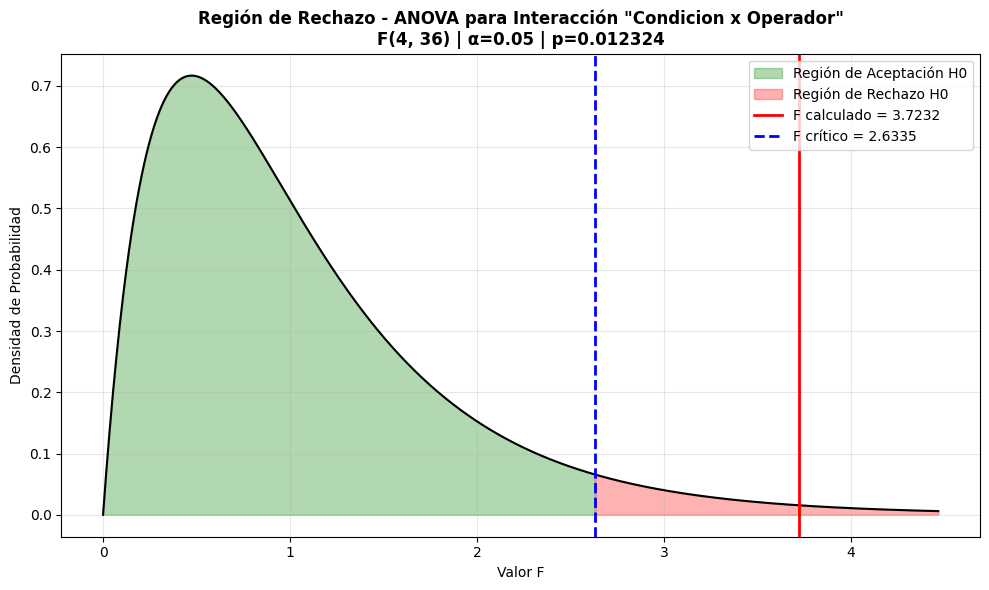

  Decisión Estadística: Rechazamos H0
  Conclusión Práctica: Existe una interacción estadísticamente significativa entre la condición y el operador en la resistencia. El efecto de la condición en la resistencia varía significativamente dependiendo del operador, y viceversa.

--- Pruebas Post-Hoc de Tukey HSD (si los factores principales son significativos) ---

### Tukey HSD para el factor 'Condicion' ###
grupo1 grupo2  dif_media  p_ajustado  limite_inferior  limite_superior  rechazar_h0
    C1     C2     4.5394      0.0017           1.5760           7.5027         True
    C1     C3    10.7678      0.0000           7.8044          13.7311         True
    C2     C3     6.2284      0.0000           3.2650           9.1918         True


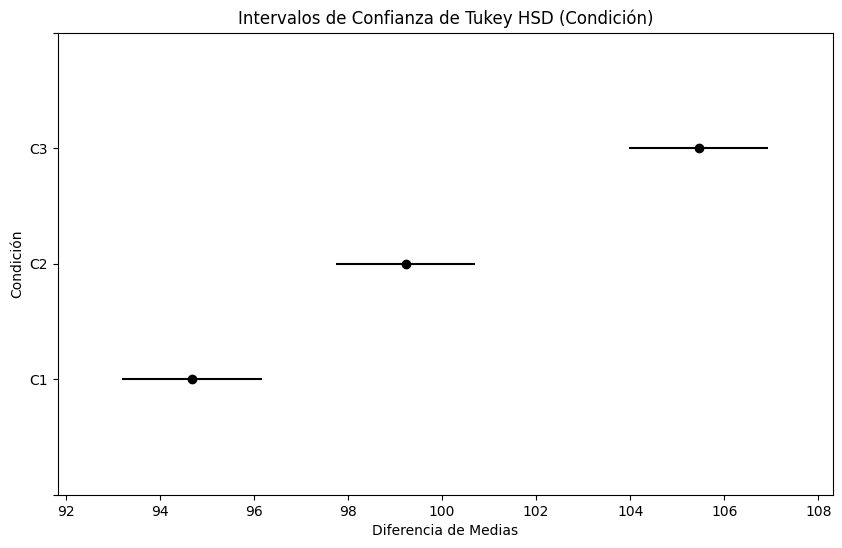


### Tukey HSD para el factor 'Operador' ###
grupo1 grupo2  dif_media  p_ajustado  limite_inferior  limite_superior  rechazar_h0
    O1     O2     3.0274      0.2277          -1.3710           7.4257        False
    O1     O3     6.4556      0.0026           2.0572          10.8539         True
    O2     O3     3.4282      0.1531          -0.9701           7.8265        False


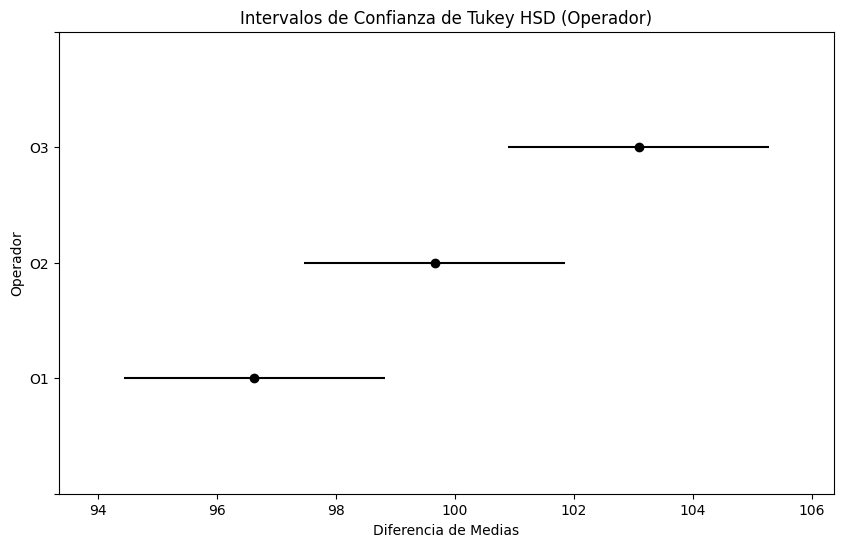


### Nota sobre la Interacción 'Condicion x Operador' ###
La interacción 'Condicion x Operador' fue estadísticamente significativa (p < 0.0500).
Esto indica que el efecto de una condición en la resistencia varía significativamente
dependiendo del operador, y viceversa. Para comprender en detalle esta interacción,
se recomendarían análisis de efectos simples (Simple Main Effects Analysis) o
comparaciones de contrastes específicos, en lugar de un Tukey HSD simple sobre
los factores principales de forma aislada.

--- Resumen Completo de los Hallazgos del ANOVA de Dos Vías ---

Análisis ANOVA de Dos Vías sobre la Resistencia con los factores 'Condición' y 'Operador', y su interacción.
Nivel de significancia (α) = 0.05

--- Factor: Condición ---
F-estadístico: 143.2905 (gl: 2, 36)
Valor p: 0.000000
F-crítico: 3.2594
Decisión Estadística: Rechazamos H0
Conclusión Práctica: Existen diferencias estadísticamente significativas en la resistencia promedio entre las diferentes condiciones. La cond

In [22]:
# @title
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ============================================================================
# DATOS DEL EJERCICIO 8 - Resistencia de un material
# ============================================================================

# Definir condiciones y operadores
condiciones = ['C1', 'C2', 'C3']
operadores = ['O1', 'O2', 'O3']
obs_por_combinacion = 5

# Generar datos de resistencia (simulados)
# Se asume una media base, efectos para condiciones, efectos para operadores
# y un efecto de interacción, más un ruido aleatorio.

np.random.seed(42) # Para reproducibilidad

# Media global
base_mean = 100

# Efectos de las condiciones
effect_C1 = -5
effect_C2 = 0
effect_C3 = 5

# Efectos de los operadores
effect_O1 = -3
effect_O2 = 0
effect_O3 = 3

# Efectos de interacción (simulados, pueden ser nulos si no se espera interacción)
# Ejemplo: C1 con O1 podría ser peor de lo esperado, C3 con O3 mejor
interaction_C1O1 = -2
interaction_C1O2 = 0
interaction_C1O3 = 1
interaction_C2O1 = 0
interaction_C2O2 = 0
interaction_C2O3 = 0
interaction_C3O1 = 1
interaction_C3O2 = 0
interaction_C3O3 = 2

data_rows = []

for condicion in condiciones:
    for operador in operadores:
        # Calcular la media para esta combinación
        current_mean = base_mean
        if condicion == 'C1':
            current_mean += effect_C1
        elif condicion == 'C2':
            current_mean += effect_C2
        elif condicion == 'C3':
            current_mean += effect_C3

        if operador == 'O1':
            current_mean += effect_O1
        elif operador == 'O2':
            current_mean += effect_O2
        elif operador == 'O3':
            current_mean += effect_O3

        # Añadir efecto de interacción
        if condicion == 'C1' and operador == 'O1':
            current_mean += interaction_C1O1
        elif condicion == 'C1' and operador == 'O3':
            current_mean += interaction_C1O3
        elif condicion == 'C3' and operador == 'O1':
            current_mean += interaction_C3O1
        elif condicion == 'C3' and operador == 'O3':
            current_mean += interaction_C3O3

        # Generar observaciones con ruido aleatorio
        for _ in range(obs_por_combinacion):
            resistencia = current_mean + np.random.normal(0, 2) # Ruido normal con desviación estándar de 2
            data_rows.append({'Condicion': condicion, 'Operador': operador, 'Resistencia': resistencia})

df_anova = pd.DataFrame(data_rows)

print("DataFrame de datos para ANOVA de Dos Vías (primeras 5 filas):")
print(df_anova.head())
print("\nInformación del DataFrame:")
print(df_anova.info())
print("\nMedias de Resistencia por Condición y Operador:")
print(df_anova.groupby(['Condicion', 'Operador'])['Resistencia'].mean())

# ============================================================================
# ANOVA DE DOS VÍAS CON INTERACCIÓN
# ============================================================================

print("\n--- Realizando ANOVA de Dos Vías con Interacción ---")
modelo = ols('Resistencia ~ C(Condicion) * C(Operador)', data=df_anova).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2) # typ=2 para ANOVA tipo II sum of squares

print("\n=== Tabla ANOVA de Dos Vías para el Ejercicio 8 ===")
print(tabla_anova)

# ============================================================================
# INTERPRETACIÓN GENERAL DE LA TABLA ANOVA
# ============================================================================

alpha = 0.05
print(f"\n--- Interpretación General de la Tabla ANOVA (\u03b1 = {alpha}): ---")
for factor in tabla_anova.index:
    if factor != "Residual":
        p = tabla_anova.loc[factor, "PR(>F)"]
        if p < alpha:
            print(f"\u2713 El factor '{factor}' tiene un efecto significativo (p = {p:.4f})")
        else:
            print(f"\u2717 El factor '{factor}' NO es significativo (p = {p:.4f})")

# ============================================================================
# GRÁFICO DE INTERACCIÓN
# ============================================================================

print("\n=== Gráfico de Interacción (Condicion x Operador) ===")
plt.figure(figsize=(10, 6))
sm.graphics.interaction_plot(df_anova['Condicion'], df_anova['Operador'], df_anova['Resistencia'],
                             colors=['blue', 'green', 'red'], markers=['o', 'D', 's'], ms=10)
plt.title('Interacción Condicion x Operador - Resistencia')
plt.xlabel('Condicion')
plt.ylabel('Resistencia Promedio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Operador')
plt.tight_layout()
plt.show()

# ============================================================================
# ANÁLISIS DETALLADO DE CADA FACTOR E INTERACCIÓN
# ============================================================================

gl_e_error = tabla_anova.loc['Residual', 'df']

# --- Análisis Detallado para el Factor 'Condicion' ---
print("\n--- Análisis Detallado para el Factor 'Condicion' ---")
F_condicion = tabla_anova.loc['C(Condicion)', 'F']
gl_b_condicion = tabla_anova.loc['C(Condicion)', 'df']
p_value_condicion = tabla_anova.loc['C(Condicion)', 'PR(>F)']
F_crit_condicion = stats.f.ppf(1 - alpha, gl_b_condicion, gl_e_error)

print(f"  Estadístico F calculado: {F_condicion:.4f}")
print(f"  Grados de libertad (numerador): {gl_b_condicion:.0f}")
print(f"  Grados de libertad (denominador): {gl_e_error:.0f}")
print(f"  Valor p: {p_value_condicion:.6f}")
print(f"  F-crítico: {F_crit_condicion:.4f}")

x_condicion = np.linspace(0, max(F_condicion, F_crit_condicion) * 1.2, 1000)
y_condicion = stats.f.pdf(x_condicion, gl_b_condicion, gl_e_error)

plt.figure(figsize=(10, 6))
plt.plot(x_condicion, y_condicion, 'k-', linewidth=1.5)
plt.fill_between(x_condicion[x_condicion <= F_crit_condicion], y_condicion[x_condicion <= F_crit_condicion], color='green', alpha=0.3, label='Región de Aceptación H0')
plt.fill_between(x_condicion[x_condicion >= F_crit_condicion], y_condicion[x_condicion >= F_crit_condicion], color='red', alpha=0.3, label='Región de Rechazo H0')
plt.axvline(F_condicion, color='red', linewidth=2, label=f'F calculado = {F_condicion:.4f}')
plt.axvline(F_crit_condicion, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_condicion:.4f}')
plt.title(f'Región de Rechazo - ANOVA para el factor "Condición"\nF({gl_b_condicion:.0f}, {gl_e_error:.0f}) | \u03b1={alpha} | p={p_value_condicion:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if p_value_condicion < alpha:
    decision_condicion = "Rechazamos H0"
    conclusion_condicion = "Existen diferencias estadísticamente significativas en la resistencia promedio entre las diferentes condiciones. La condición tiene un efecto significativo en la resistencia."
else:
    decision_condicion = "No rechazamos H0"
    conclusion_condicion = "No hay evidencia suficiente para concluir que existen diferencias significativas en la resistencia promedio entre las diferentes condiciones. La condición no tiene un efecto significativo en la resistencia."
print(f"  Decisión Estadística: {decision_condicion}")
print(f"  Conclusión Práctica: {conclusion_condicion}")

# --- Análisis Detallado para el Factor 'Operador' ---
print("\n--- Análisis Detallado para el Factor 'Operador' ---")
F_operador = tabla_anova.loc['C(Operador)', 'F']
gl_b_operador = tabla_anova.loc['C(Operador)', 'df']
p_value_operador = tabla_anova.loc['C(Operador)', 'PR(>F)']
F_crit_operador = stats.f.ppf(1 - alpha, gl_b_operador, gl_e_error)

print(f"  Estadístico F calculado: {F_operador:.4f}")
print(f"  Grados de libertad (numerador): {gl_b_operador:.0f}")
print(f"  Grados de libertad (denominador): {gl_e_error:.0f}")
print(f"  Valor p: {p_value_operador:.6f}")
print(f"  F-crítico: {F_crit_operador:.4f}")

x_operador = np.linspace(0, max(F_operador, F_crit_operador) * 1.2, 1000)
y_operador = stats.f.pdf(x_operador, gl_b_operador, gl_e_error)

plt.figure(figsize=(10, 6))
plt.plot(x_operador, y_operador, 'k-', linewidth=1.5)
plt.fill_between(x_operador[x_operador <= F_crit_operador], y_operador[x_operador <= F_crit_operador], color='green', alpha=0.3, label='Región de Aceptación H0')
plt.fill_between(x_operador[x_operador >= F_crit_operador], y_operador[x_operador >= F_crit_operador], color='red', alpha=0.3, label='Región de Rechazo H0')
plt.axvline(F_operador, color='red', linewidth=2, label=f'F calculado = {F_operador:.4f}')
plt.axvline(F_crit_operador, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_operador:.4f}')
plt.title(f'Región de Rechazo - ANOVA para el factor "Operador"\nF({gl_b_operador:.0f}, {gl_e_error:.0f}) | \u03b1={alpha} | p={p_value_operador:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if p_value_operador < alpha:
    decision_operador = "Rechazamos H0"
    conclusion_operador = "Existen diferencias estadísticamente significativas en la resistencia promedio entre los diferentes operadores. El operador tiene un efecto significativo en la resistencia."
else:
    decision_operador = "No rechazamos H0"
    conclusion_operador = "No hay evidencia suficiente para concluir que existen diferencias significativas en la resistencia promedio entre los diferentes operadores. El operador no tiene un efecto significativo en la resistencia."
print(f"  Decisión Estadística: {decision_operador}")
print(f"  Conclusión Práctica: {conclusion_operador}")

# --- Análisis Detallado para la Interacción 'Condicion x Operador' ---
print("\n--- Análisis Detallado para la Interacción 'Condicion x Operador' ---")
F_interaccion_co = tabla_anova.loc['C(Condicion):C(Operador)', 'F']
gl_b_interaccion_co = tabla_anova.loc['C(Condicion):C(Operador)', 'df']
p_value_interaccion_co = tabla_anova.loc['C(Condicion):C(Operador)', 'PR(>F)']
F_crit_interaccion_co = stats.f.ppf(1 - alpha, gl_b_interaccion_co, gl_e_error)

print(f"  Estadístico F calculado: {F_interaccion_co:.4f}")
print(f"  Grados de libertad (numerador): {gl_b_interaccion_co:.0f}")
print(f"  Grados de libertad (denominador): {gl_e_error:.0f}")
print(f"  Valor p: {p_value_interaccion_co:.6f}")
print(f"  F-crítico: {F_crit_interaccion_co:.4f}")

x_interaccion_co = np.linspace(0, max(F_interaccion_co, F_crit_interaccion_co) * 1.2, 1000)
y_interaccion_co = stats.f.pdf(x_interaccion_co, gl_b_interaccion_co, gl_e_error)

plt.figure(figsize=(10, 6))
plt.plot(x_interaccion_co, y_interaccion_co, 'k-', linewidth=1.5)
plt.fill_between(x_interaccion_co[x_interaccion_co <= F_crit_interaccion_co], y_interaccion_co[x_interaccion_co <= F_crit_interaccion_co], color='green', alpha=0.3, label='Región de Aceptación H0')
plt.fill_between(x_interaccion_co[x_interaccion_co >= F_crit_interaccion_co], y_interaccion_co[x_interaccion_co >= F_crit_interaccion_co], color='red', alpha=0.3, label='Región de Rechazo H0')
plt.axvline(F_interaccion_co, color='red', linewidth=2, label=f'F calculado = {F_interaccion_co:.4f}')
plt.axvline(F_crit_interaccion_co, color='blue', linestyle='--', linewidth=2, label=f'F crítico = {F_crit_interaccion_co:.4f}')
plt.title(f'Región de Rechazo - ANOVA para Interacción "Condicion x Operador"\nF({gl_b_interaccion_co:.0f}, {gl_e_error:.0f}) | \u03b1={alpha} | p={p_value_interaccion_co:.6f}', fontsize=12, fontweight='bold')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if p_value_interaccion_co < alpha:
    decision_interaccion_co = "Rechazamos H0"
    conclusion_interaccion_co = "Existe una interacción estadísticamente significativa entre la condición y el operador en la resistencia. El efecto de la condición en la resistencia varía significativamente dependiendo del operador, y viceversa."
else:
    decision_interaccion_co = "No rechazamos H0"
    conclusion_interaccion_co = "No hay evidencia suficiente para concluir que existe una interacción significativa entre la condición y el operador en la resistencia. El efecto de un factor (condición u operador) en la resistencia es consistente a través de los niveles del otro factor."
print(f"  Decisión Estadística: {decision_interaccion_co}")
print(f"  Conclusión Práctica: {conclusion_interaccion_co}")

# ============================================================================
# PRUEBAS POST-HOC DE TUKEY HSD (si los factores principales son significativos)
# ============================================================================

print(
    "\n--- Pruebas Post-Hoc de Tukey HSD (si los factores principales son significativos) ---"
)

# --- Prueba Post-Hoc para 'Condicion' ---
if p_value_condicion < alpha:
    print("\n### Tukey HSD para el factor 'Condicion' ###")
    tukey_condicion = pairwise_tukeyhsd(
        endog=df_anova['Resistencia'], groups=df_anova['Condicion'], alpha=alpha
    )
    df_tukey_condicion = pd.DataFrame(
        tukey_condicion._results_table.data[1:],
        columns=tukey_condicion._results_table.data[0],
    ).rename(
        columns={
            'group1': 'grupo1',
            'group2': 'grupo2',
            'meandiff': 'dif_media',
            'p-adj': 'p_ajustado',
            'lower': 'limite_inferior',
            'upper': 'limite_superior',
            'reject': 'rechazar_h0',
        }
    )
    print(df_tukey_condicion.to_string(index=False))
    # Opcional: Visualizar los resultados
    fig = tukey_condicion.plot_simultaneous(
        ylabel="Condición", xlabel="Diferencia de Medias"
    )
    plt.title("Intervalos de Confianza de Tukey HSD (Condición)")
    plt.show()
else:
    print(
        "El factor 'Condicion' no fue significativo, no se realizan pruebas post-hoc."
    )

# --- Prueba Post-Hoc para 'Operador' ---
if p_value_operador < alpha:
    print("\n### Tukey HSD para el factor 'Operador' ###")
    tukey_operador = pairwise_tukeyhsd(
        endog=df_anova['Resistencia'], groups=df_anova['Operador'], alpha=alpha
    )
    df_tukey_operador = pd.DataFrame(
        tukey_operador._results_table.data[1:],
        columns=tukey_operador._results_table.data[0],
    ).rename(
        columns={
            'group1': 'grupo1',
            'group2': 'grupo2',
            'meandiff': 'dif_media',
            'p-adj': 'p_ajustado',
            'lower': 'limite_inferior',
            'upper': 'limite_superior',
            'reject': 'rechazar_h0',
        }
    )
    print(df_tukey_operador.to_string(index=False))
    # Opcional: Visualizar los resultados
    fig = tukey_operador.plot_simultaneous(
        ylabel="Operador", xlabel="Diferencia de Medias"
    )
    plt.title("Intervalos de Confianza de Tukey HSD (Operador)")
    plt.show()
else:
    print(
        "El factor 'Operador' no fue significativo, no se realizan pruebas post-hoc."
    )

# --- Nota sobre la Interacción ---
if p_value_interaccion_co < alpha:
    print(
        "\n### Nota sobre la Interacción 'Condicion x Operador' ###"
    )
    print(
        "La interacción 'Condicion x Operador' fue estadísticamente significativa (p < {:.4f})."
        .format(alpha)
    )
    print(
        "Esto indica que el efecto de una condición en la resistencia varía significativamente"
    )
    print(
        "dependiendo del operador, y viceversa. Para comprender en detalle esta interacción,"
    )
    print(
        "se recomendarían análisis de efectos simples (Simple Main Effects Analysis) o"
    )
    print(
        "comparaciones de contrastes específicos, en lugar de un Tukey HSD simple sobre"
    )
    print("los factores principales de forma aislada.")
else:
    print(
        "\nLa interacción 'Condicion x Operador' no fue significativa."
    )

# ============================================================================
# RESUMEN COMPLETO DE LOS HALLAZGOS DEL ANOVA DE DOS VÍAS Y TUKEY HSD
# ============================================================================

print("\n--- Resumen Completo de los Hallazgos del ANOVA de Dos Vías ---")

summary_text = """
Análisis ANOVA de Dos Vías sobre la Resistencia con los factores 'Condición' y 'Operador', y su interacción.
Nivel de significancia (\u03b1) = {:.2f}

--- Factor: Condición ---
F-estadístico: {:.4f} (gl: {:.0f}, {:.0f})
Valor p: {:.6f}
F-crítico: {:.4f}
Decisión Estadística: {}
Conclusión Práctica: {}

--- Factor: Operador ---
F-estadístico: {:.4f} (gl: {:.0f}, {:.0f})
Valor p: {:.6f}
F-crítico: {:.4f}
Decisión Estadística: {}
Conclusión Práctica: {}

--- Interacción: Condición x Operador ---
F-estadístico: {:.4f} (gl: {:.0f}, {:.0f})
Valor p: {:.6f}
F-crítico: {:.4f}
Decisión Estadística: {}
Conclusión Práctica: {}

-- Pruebas Post-Hoc de Tukey HSD ---

Para el factor 'Condición':
{}

Para el factor 'Operador':
{}

Nota sobre la Interacción:
{}
"""


# Formatear resultados de Tukey para inclusión en el resumen
tukey_condicion_summary = df_tukey_condicion.to_string(index=False) if p_value_condicion < alpha else "No aplica, el factor 'Condición' no fue significativo."
tukey_operador_summary = df_tukey_operador.to_string(index=False) if p_value_operador < alpha else "No aplica, el factor 'Operador' no fue significativo."

interaccion_note = f"La interacción 'Condicion x Operador' fue estadísticamente significativa (p < {alpha:.4f}). Esto indica que el efecto de una condición en la resistencia varía significativamente dependiendo del operador, y viceversa. Para comprender en detalle esta interacción, se recomendarían análisis de efectos simples (Simple Main Effects Analysis) o comparaciones de contrastes específicos." if p_value_interaccion_co < alpha else "La interacción 'Condicion x Operador' no fue significativa."

print(summary_text.format(
    alpha,
    F_condicion, gl_b_condicion, gl_e_error, p_value_condicion, F_crit_condicion, decision_condicion, conclusion_condicion,
    F_operador, gl_b_operador, gl_e_error, p_value_operador, F_crit_operador, decision_operador, conclusion_operador,
    F_interaccion_co, gl_b_interaccion_co, gl_e_error, p_value_interaccion_co, F_crit_interaccion_co, decision_interaccion_co, conclusion_interaccion_co,
    tukey_condicion_summary,
    tukey_operador_summary,
    interaccion_note
))
